In [1]:
import sys
sys.path.append("../src/")
from model import AEDist
import numpy as np
import torch
import phate
from heatgeo.embedding import HeatGeo
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from scipy.spatial import procrustes
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
import wandb
import hydra
import os
from omegaconf import DictConfig, OmegaConf
import wandb
from hydra import initialize, compose
import pickle
from scipy.spatial.distance import pdist, squareform, cdist
import graphtools

In [2]:
# adata = sc.read('../data/old/eb.h5ad', backed='r')
adata = sc.read('../data/old/eb_hv.h5ad')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
import magic

In [4]:
magic_op = magic.MAGIC()
X_magic = magic_op.fit_transform(adata[:,:].X)

Calculating MAGIC...
  Running MAGIC on 16821 cells and 1684 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 68.24 seconds.
    Calculating affinities...
    Calculated affinities in 65.90 seconds.
  Calculated graph and diffusion operator in 137.72 seconds.
  Calculating imputation...
  Calculated imputation in 2.03 seconds.
Calculated MAGIC in 139.88 seconds.


In [5]:
pcs = np.load('../data/eb_pcs.npz')

In [6]:
generated = np.load('eb_generated.npy')

In [8]:
original_feature_means = np.mean(adata[:,:].X.toarray(), axis=0)

In [10]:
pca_loadings=pcs['pca_loadings']
pca_components=pcs['pca_components']

In [14]:
generated_ambient = generated @ pca_components.T + original_feature_means

In [16]:
generated_ambient.shape

(8000, 1684)

In [18]:
X_magic.shape

(16821, 1684)

In [19]:
adata.var_names

Index(['A2M (ENSG00000175899)', 'ABCD4 (ENSG00000119688)',
       'ABHD14B (ENSG00000114779)', 'AC007325.4 (ENSG00000278817)',
       'AC009501.4 (ENSG00000231609)', 'ACAA2 (ENSG00000167315)',
       'ACADM (ENSG00000117054)', 'ACAT2 (ENSG00000120437)',
       'ACP5 (ENSG00000102575)', 'ACP6 (ENSG00000162836)',
       ...
       'ZNF467 (ENSG00000181444)', 'ZNF503-AS1 (ENSG00000226051)',
       'ZNF589 (ENSG00000164048)', 'ZNF592 (ENSG00000166716)',
       'ZNF69 (ENSG00000198429)', 'ZNF804A (ENSG00000170396)',
       'ZNF93 (ENSG00000184635)', 'ZWINT (ENSG00000122952)',
       'ZYG11B (ENSG00000162378)', 'ZZEF1 (ENSG00000074755)'],
      dtype='object', length=1684)

In [20]:
markers = ['ZIC2', 'ZIC5', 'PAX6', 'GLI3', 'SIX3', 'SIX6']

In [23]:
genes = [name.split(' ')[0] for name in adata.var_names]

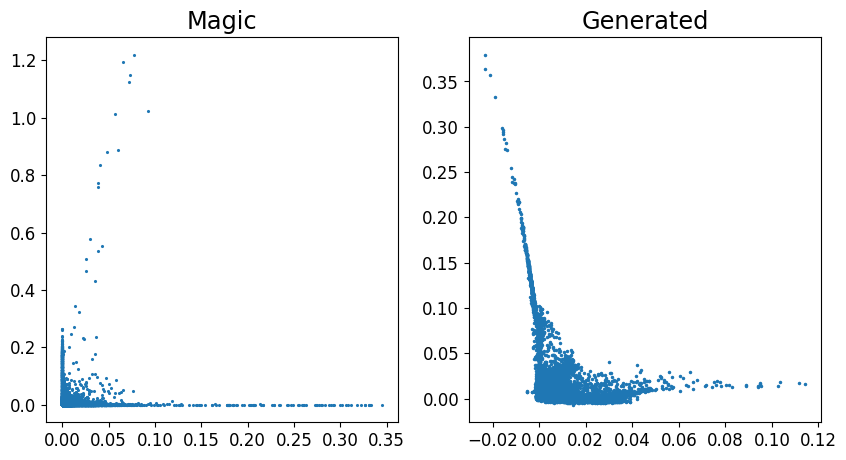

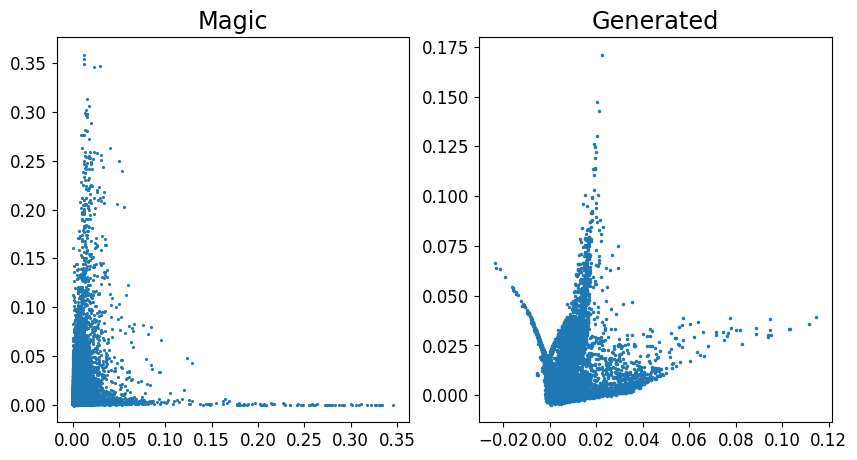

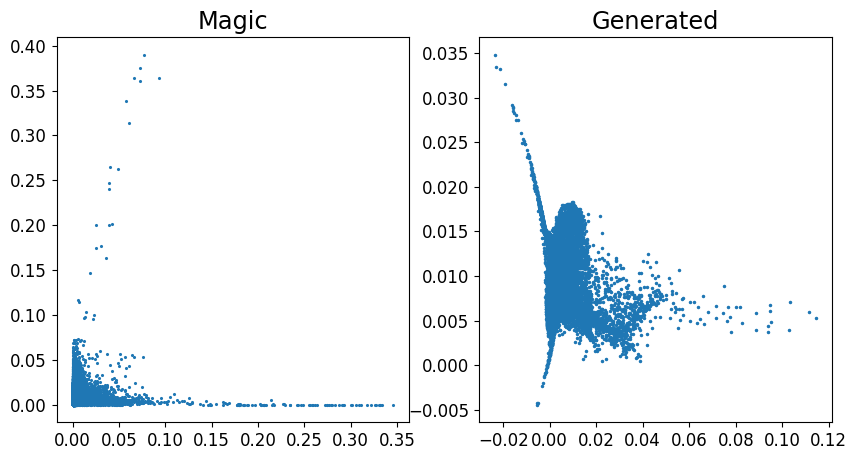

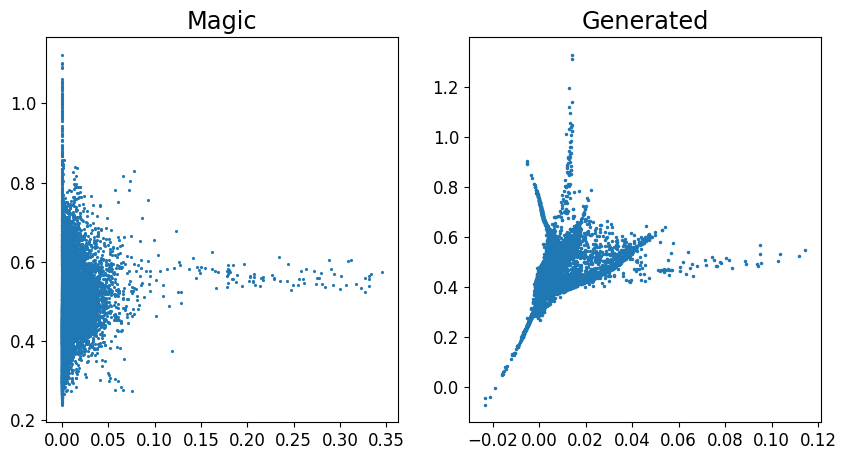

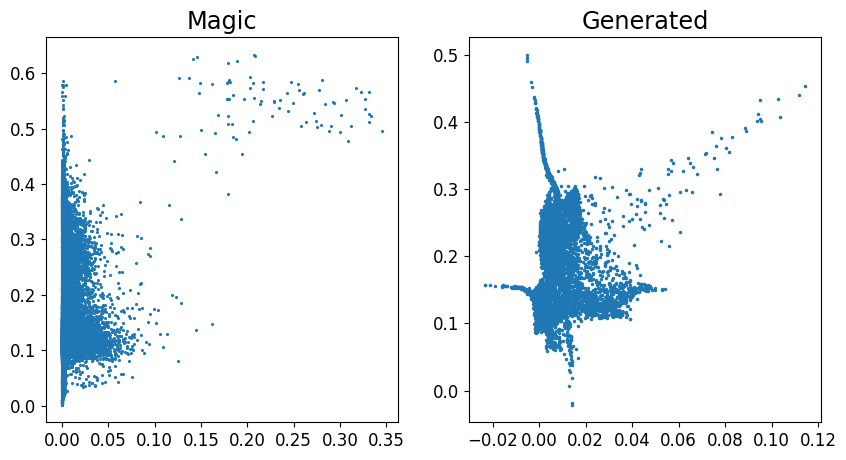

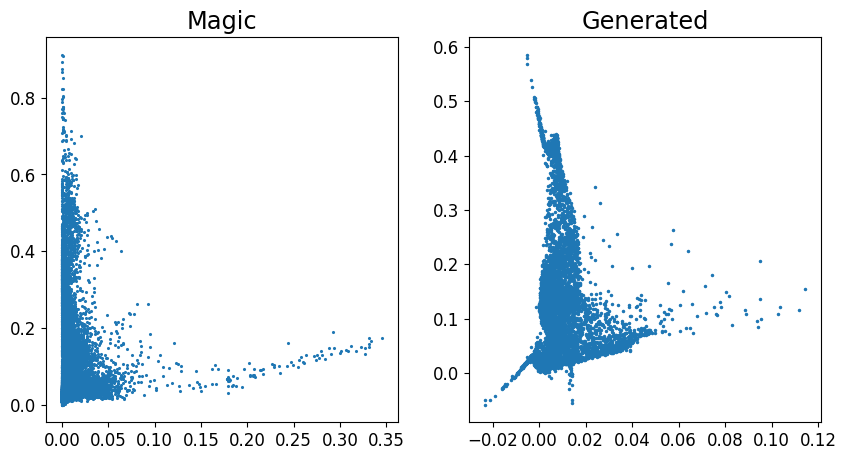

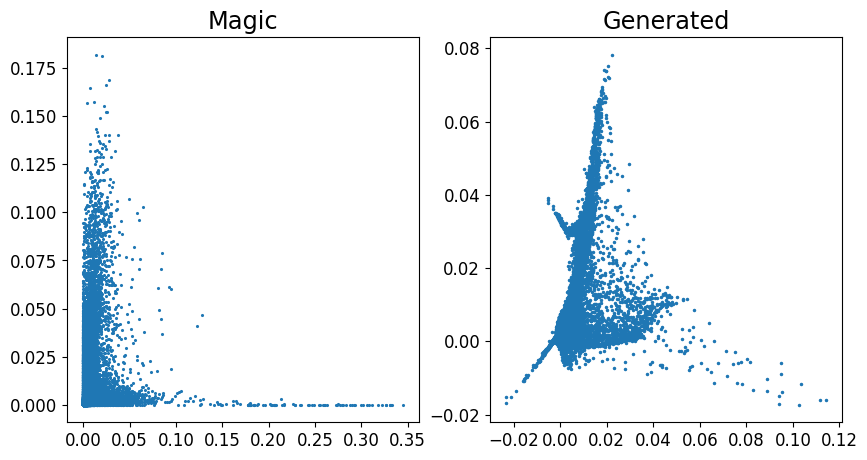

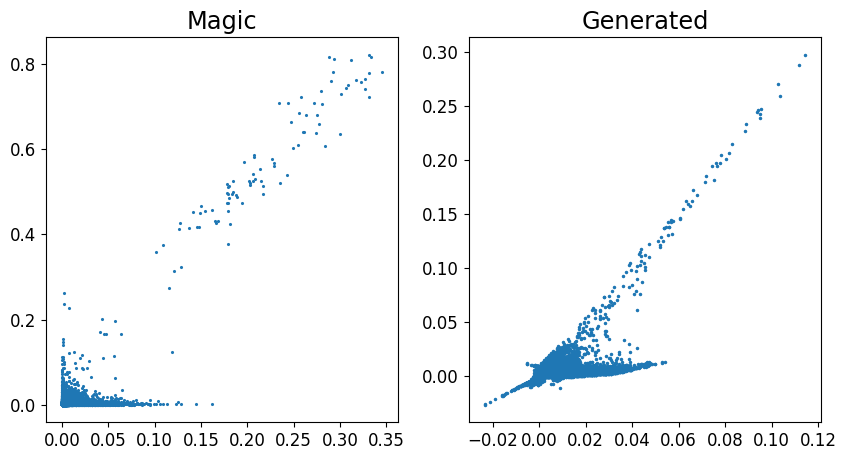

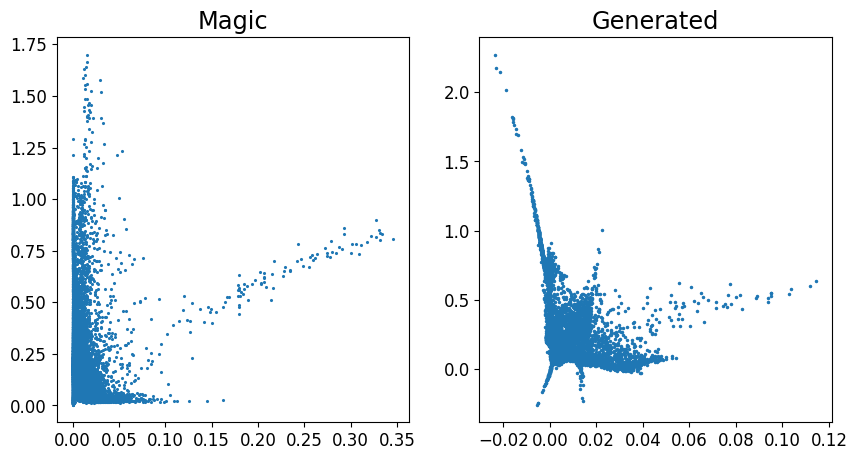

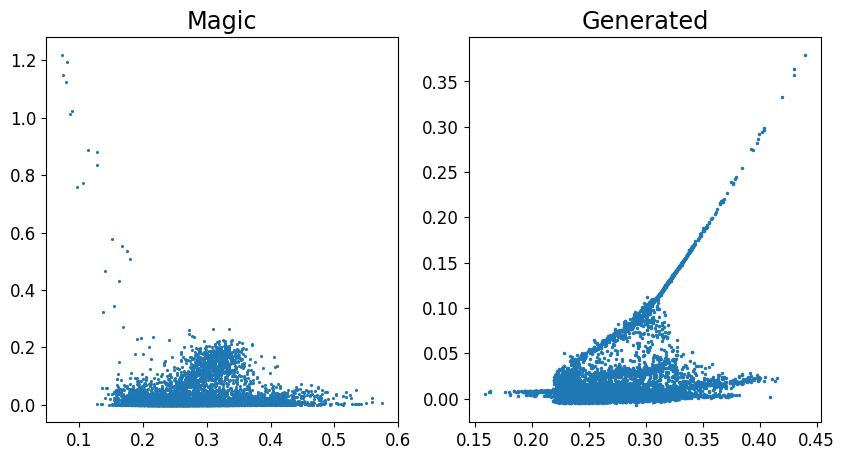

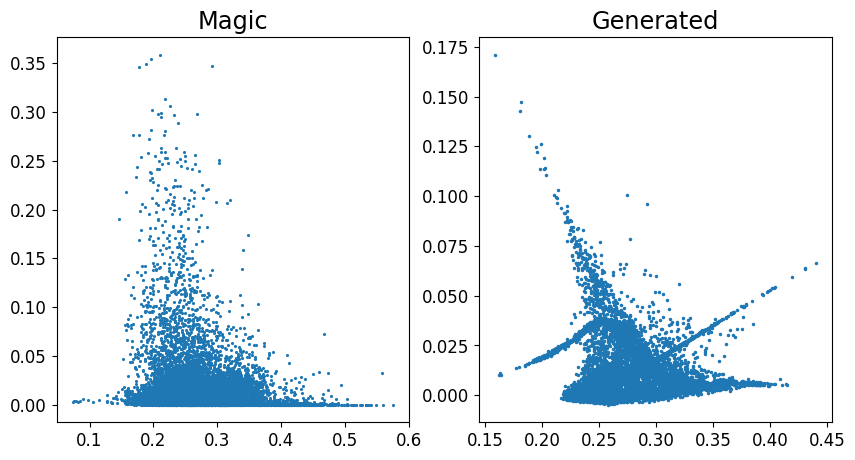

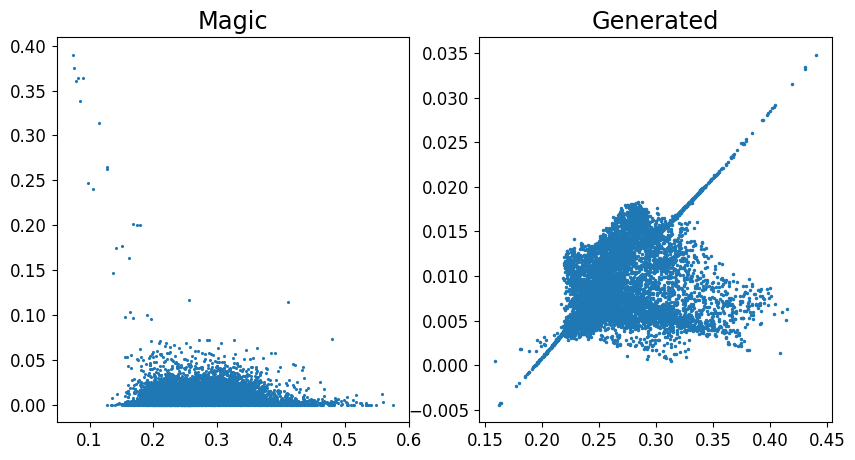

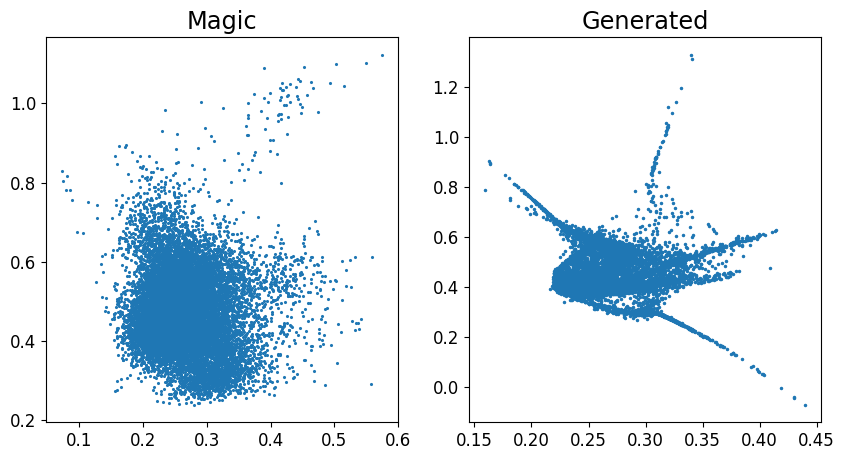

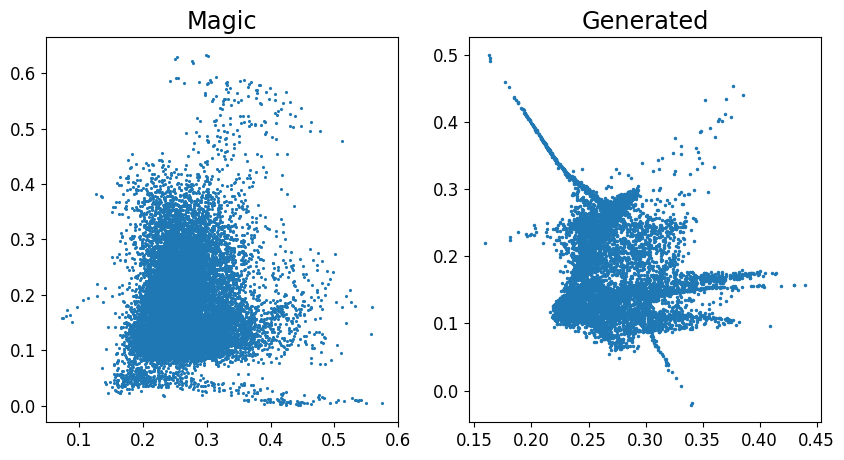

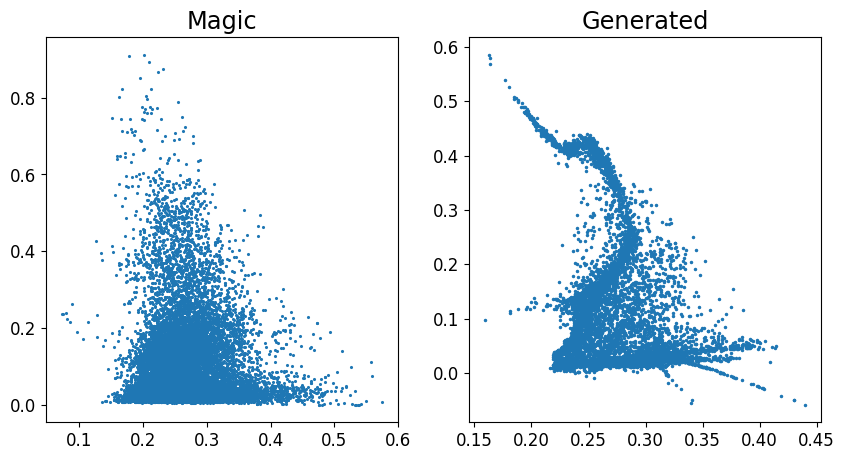

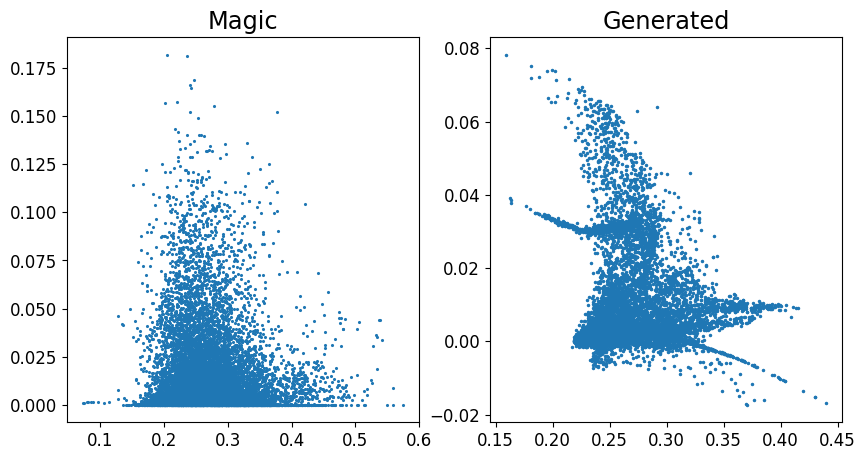

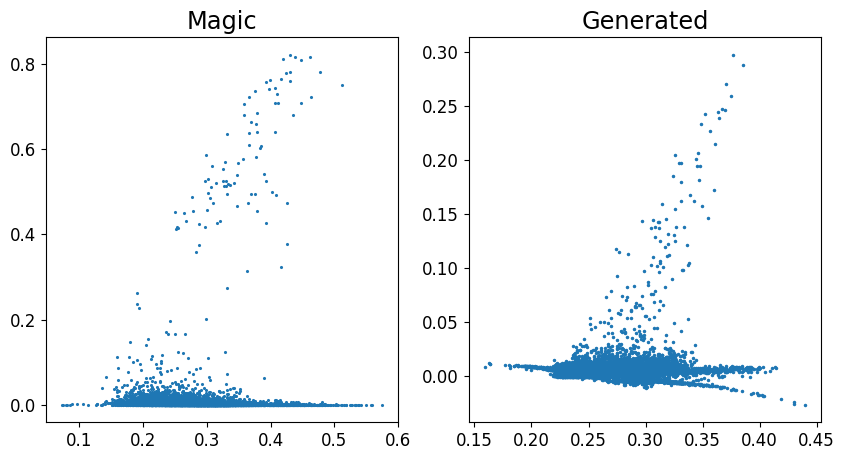

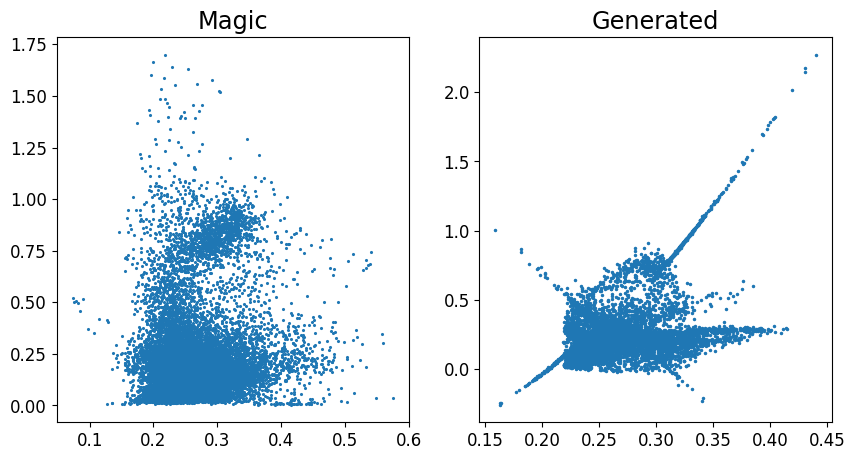

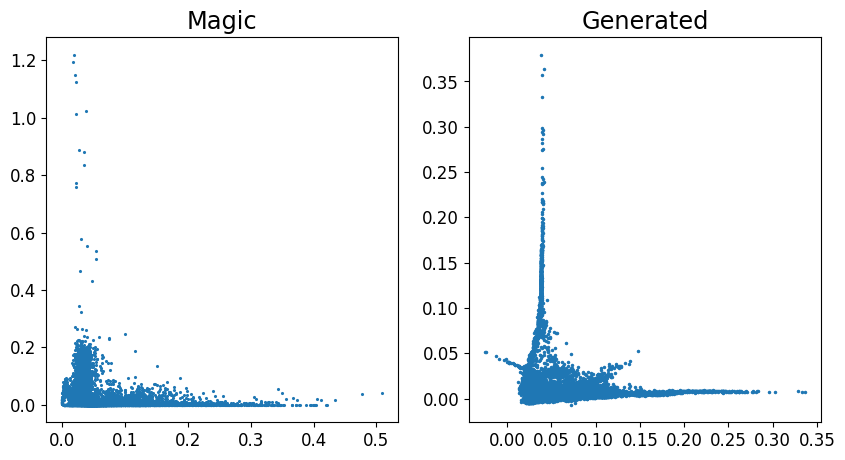

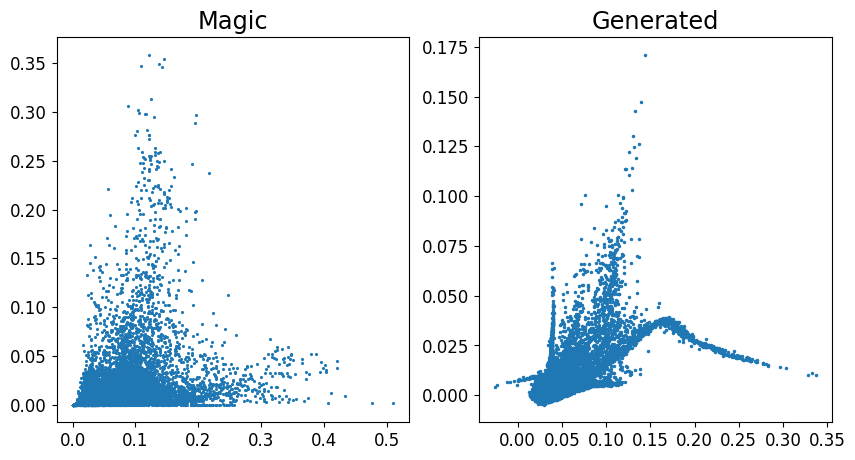

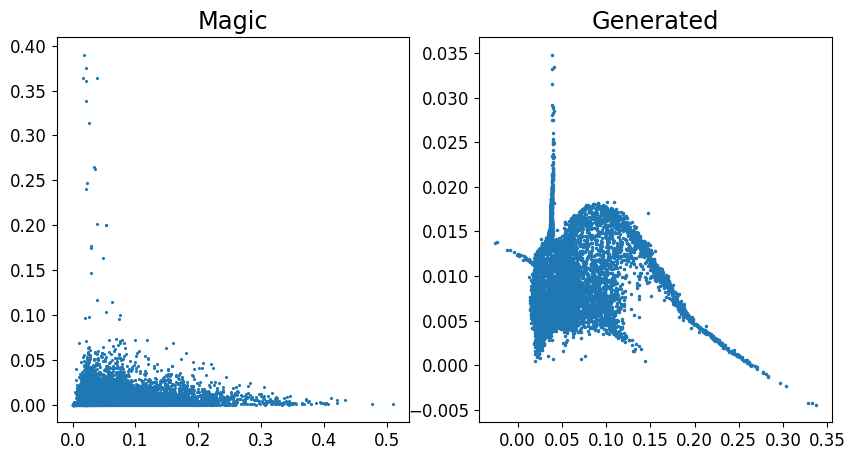

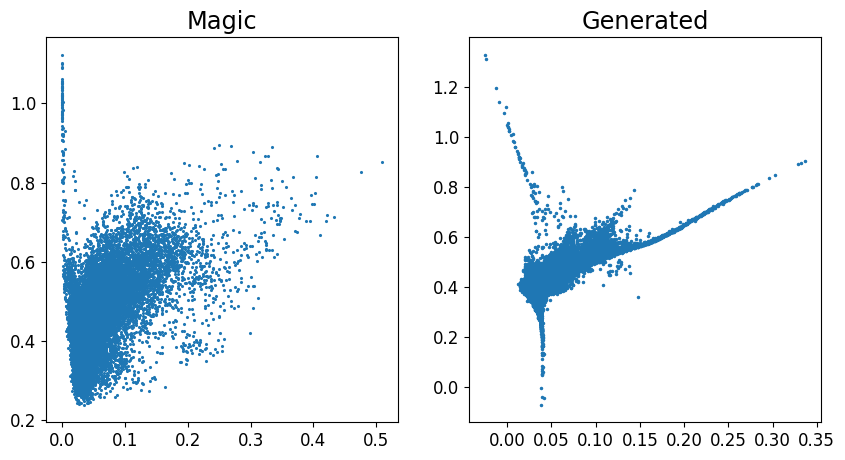

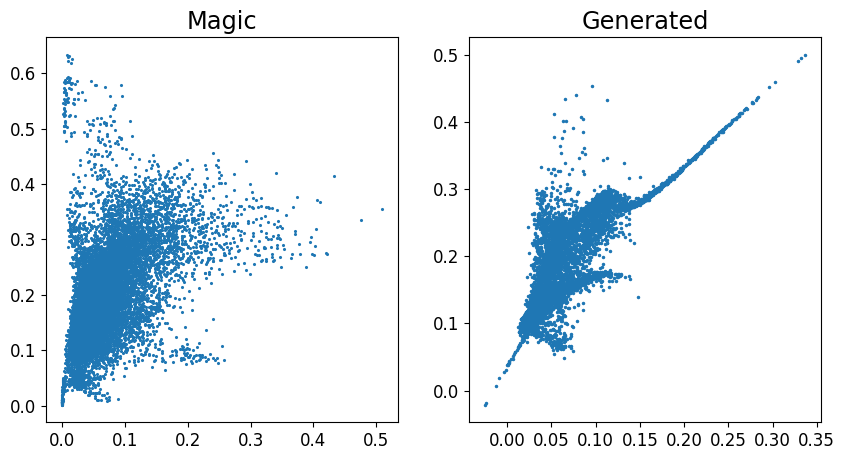

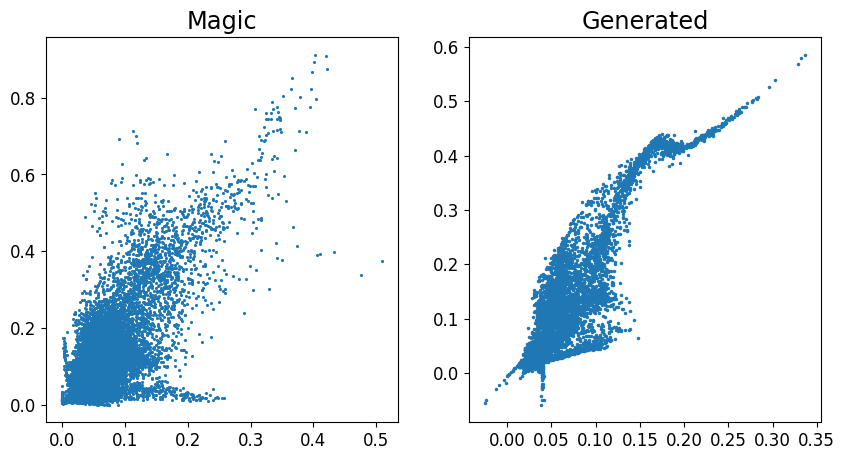

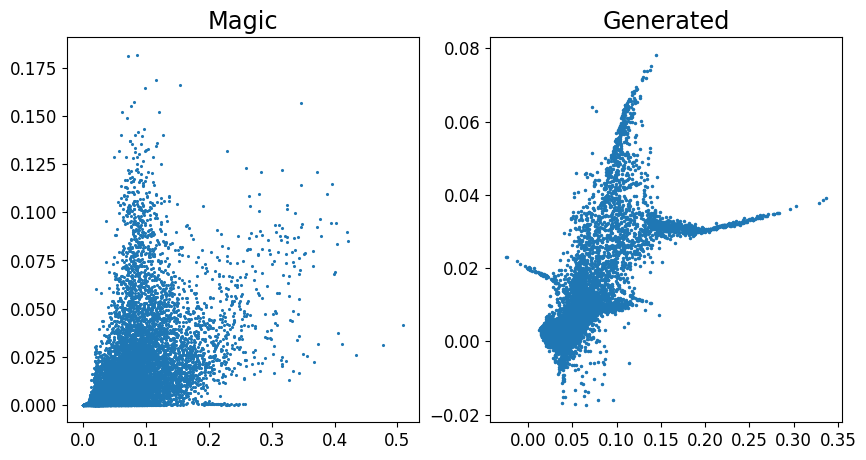

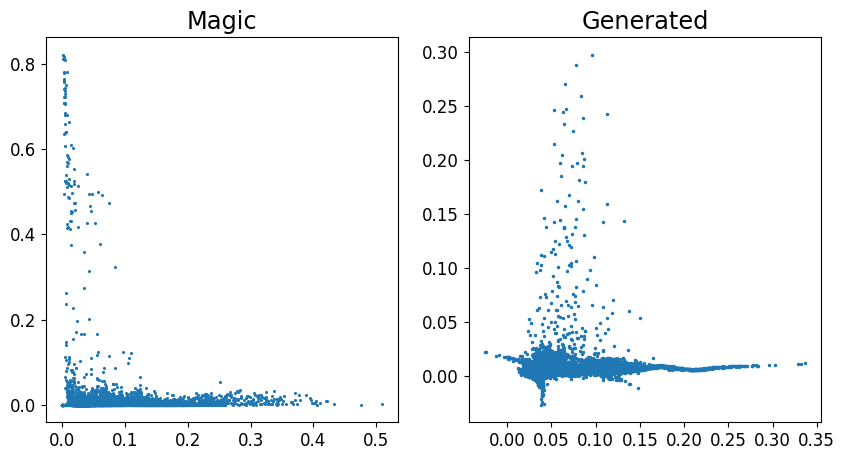

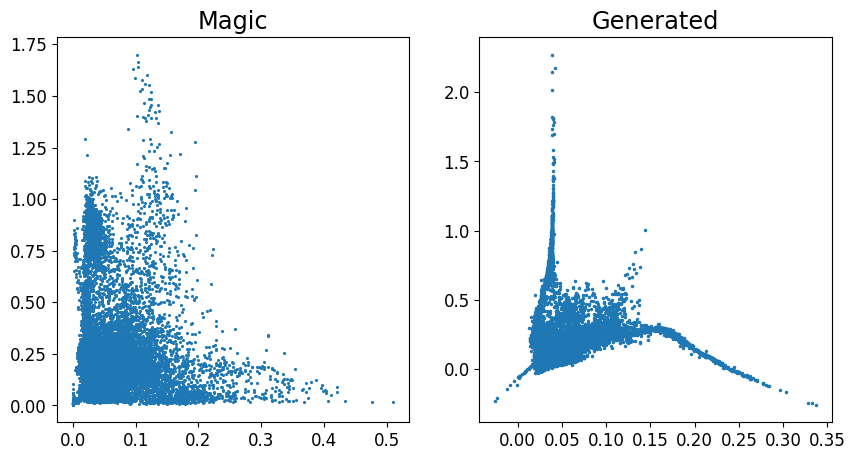

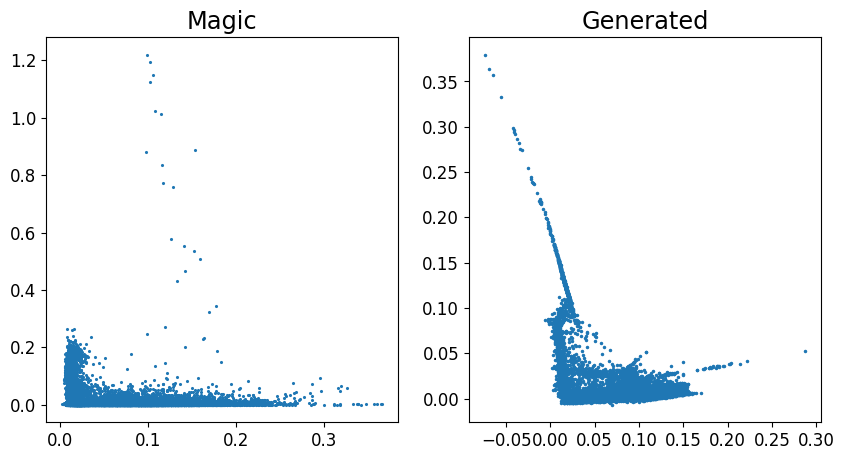

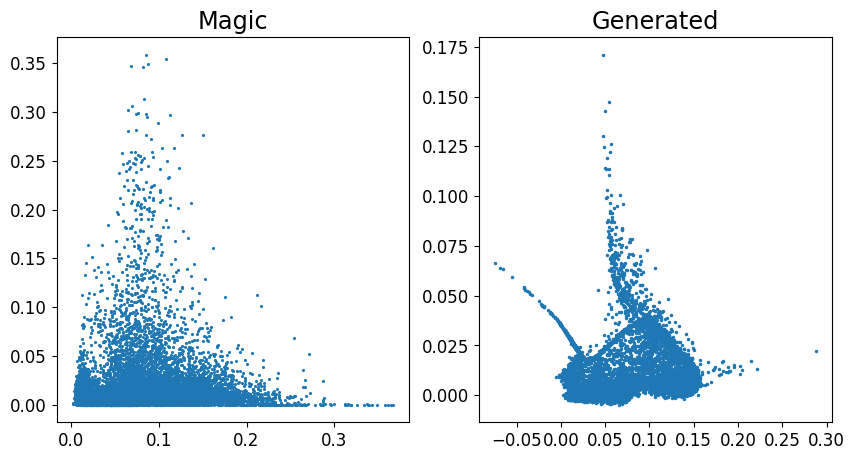

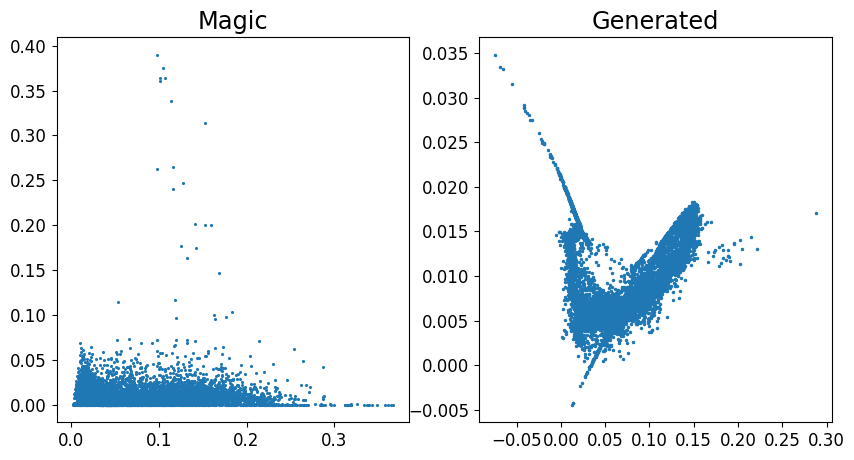

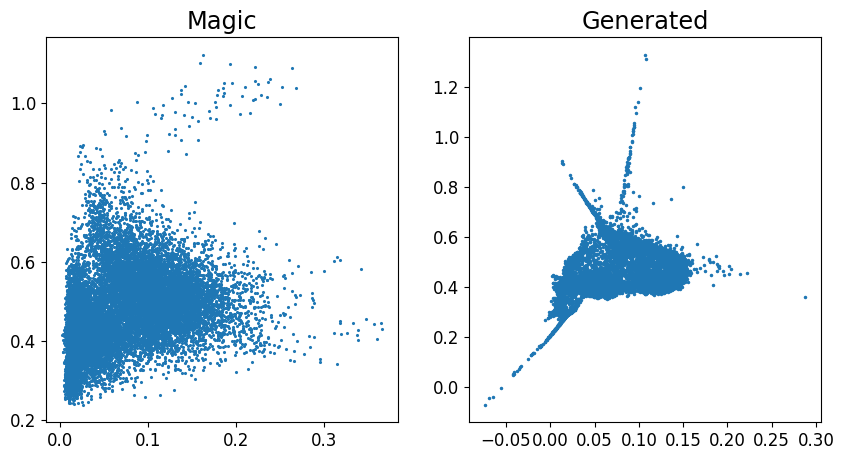

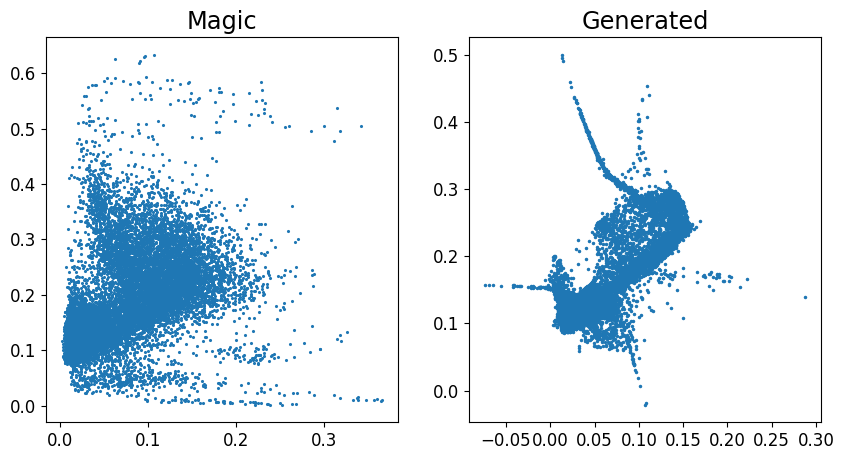

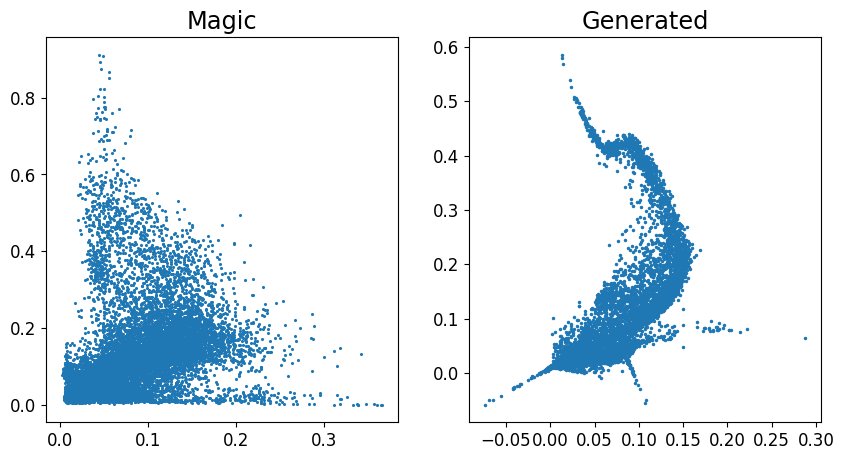

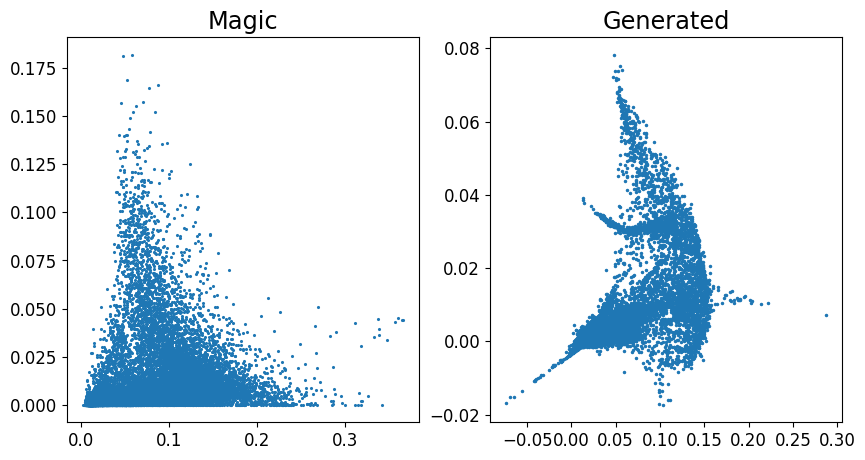

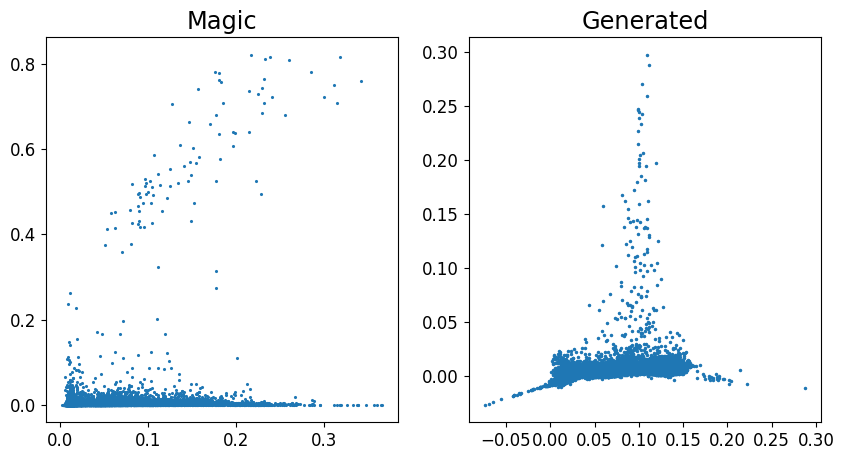

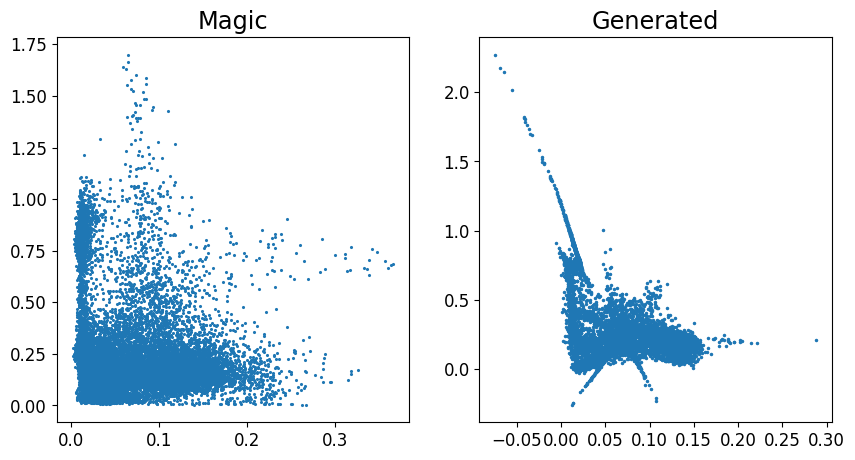

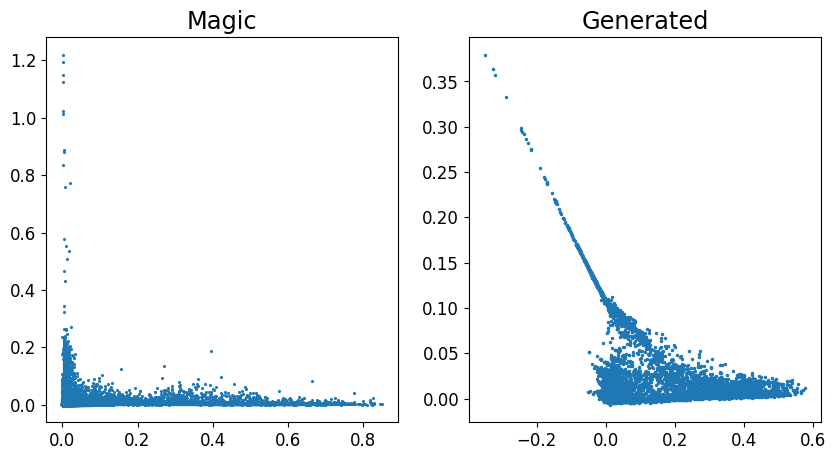

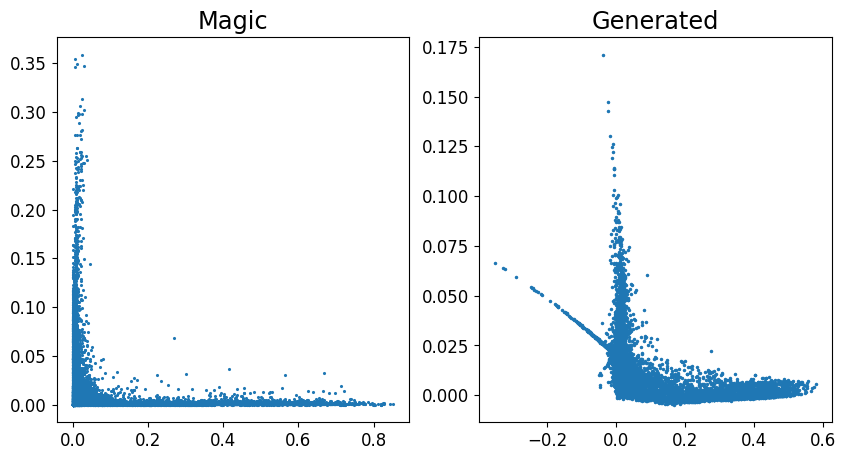

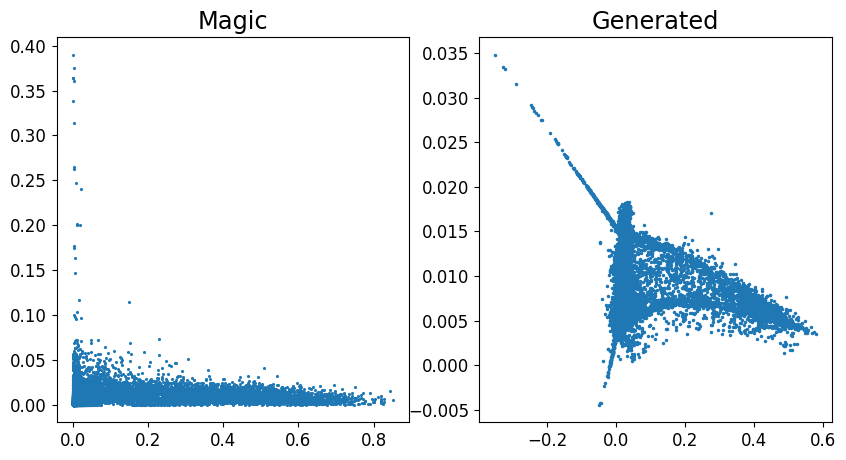

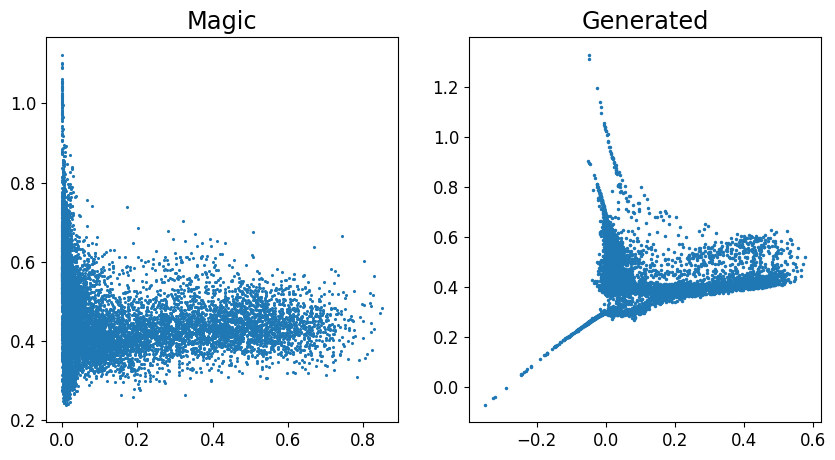

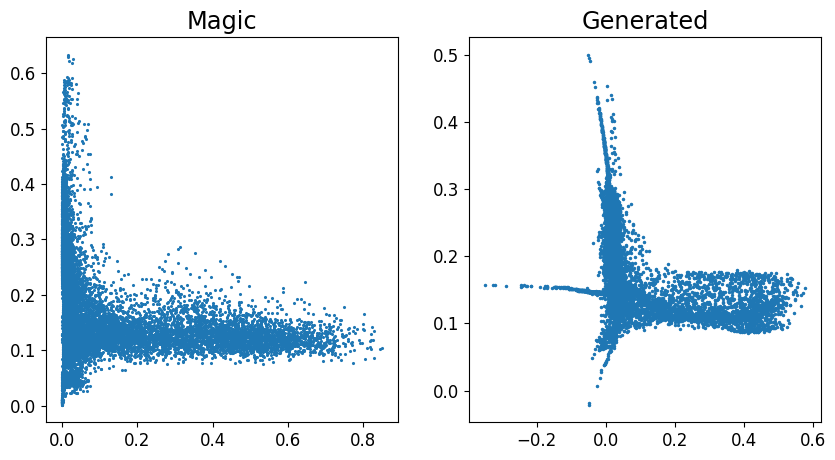

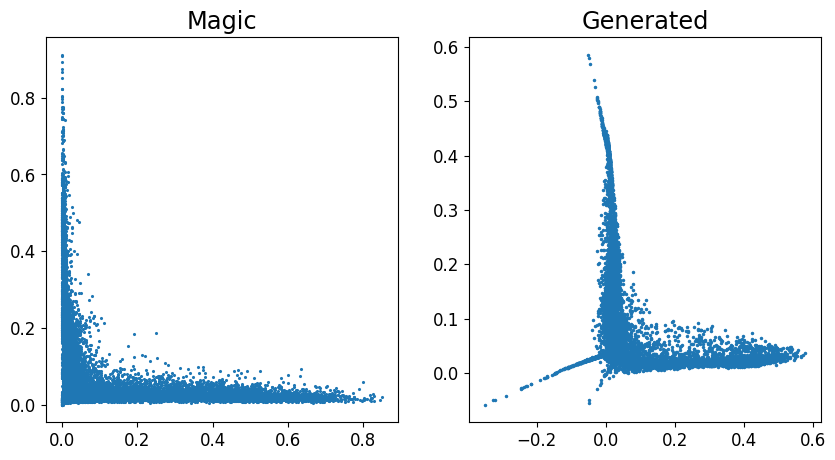

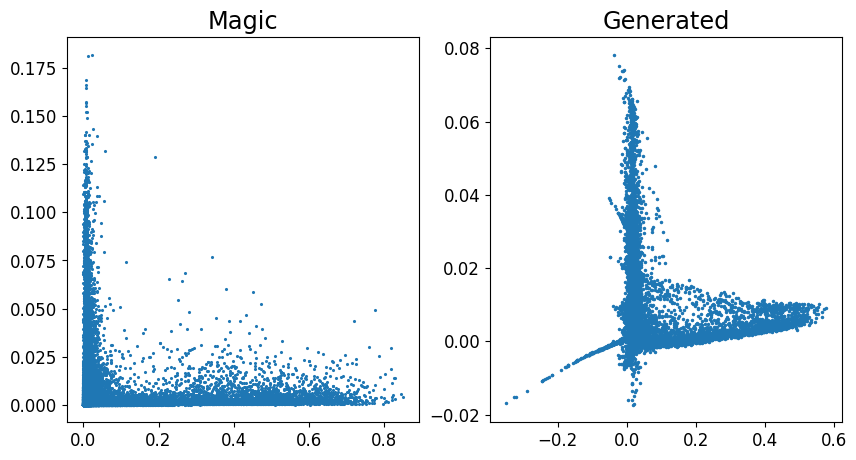

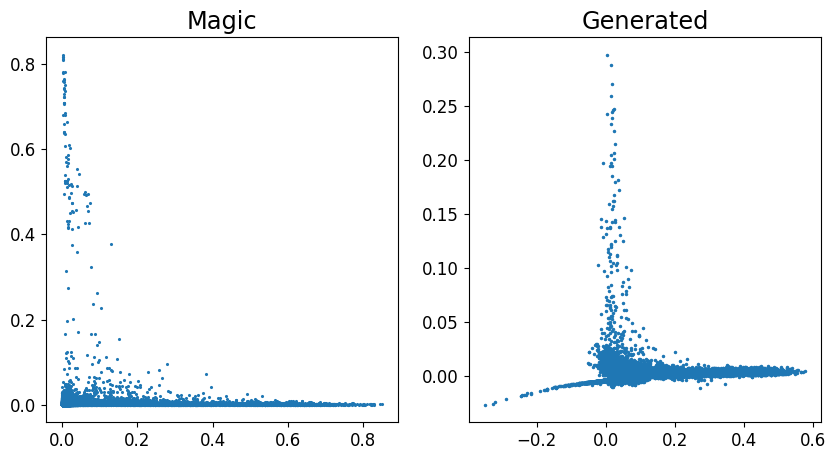

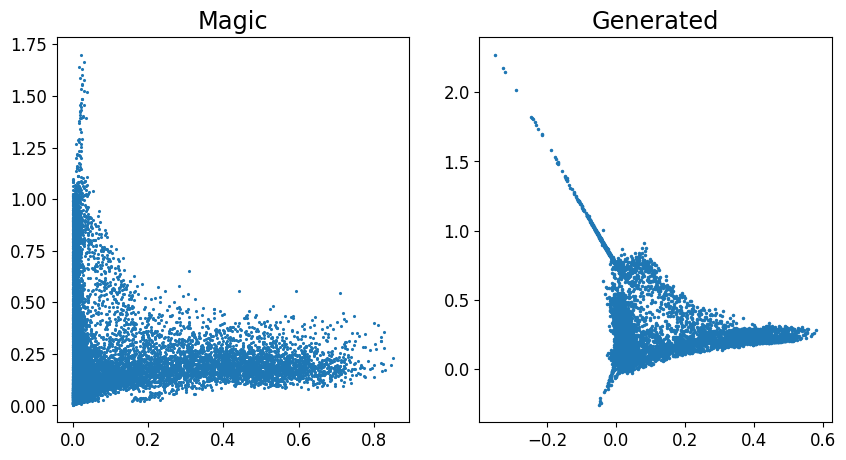

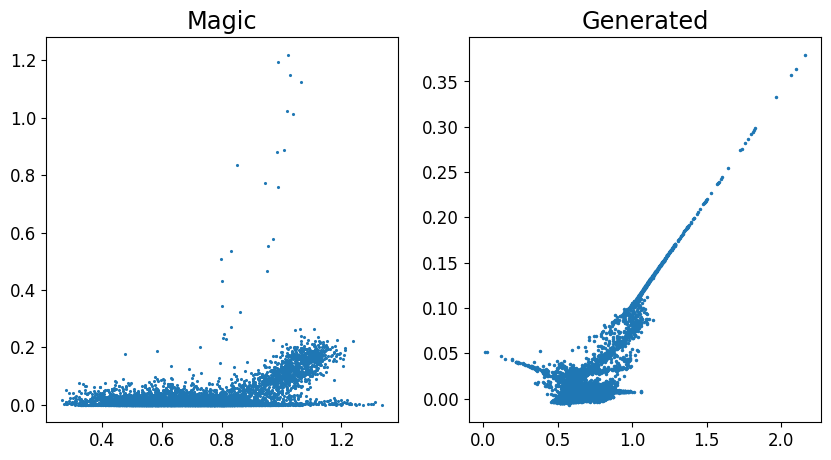

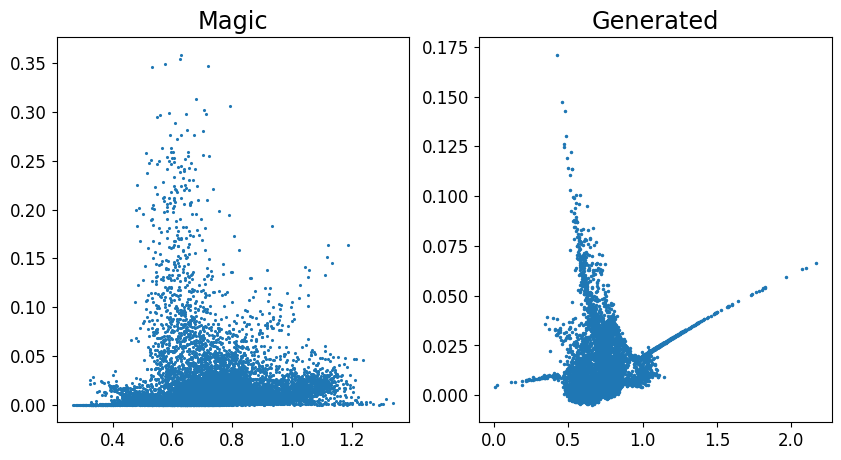

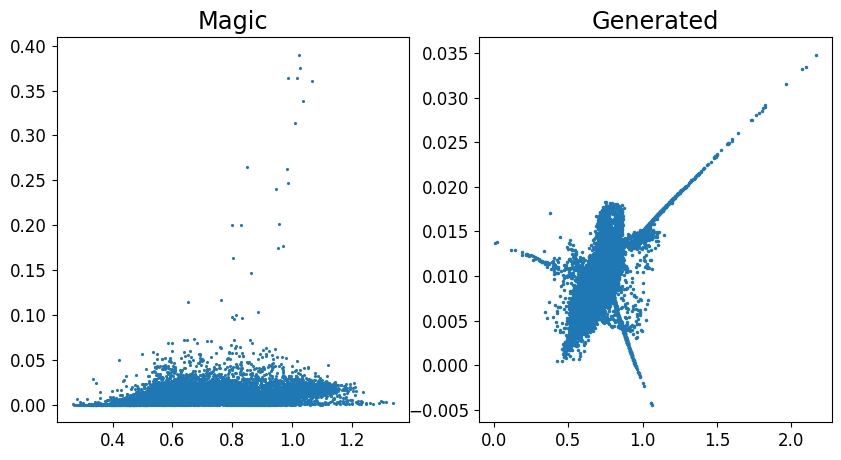

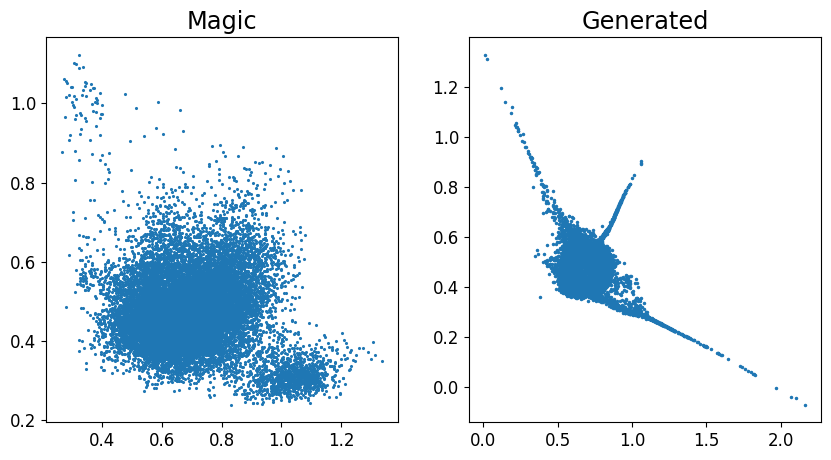

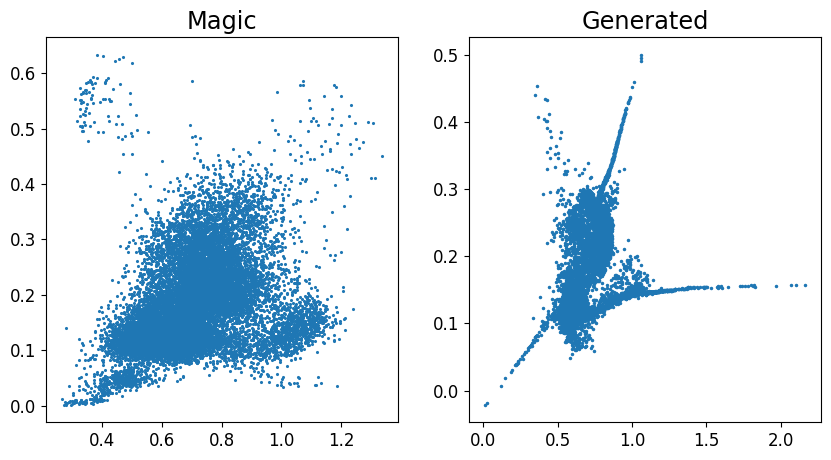

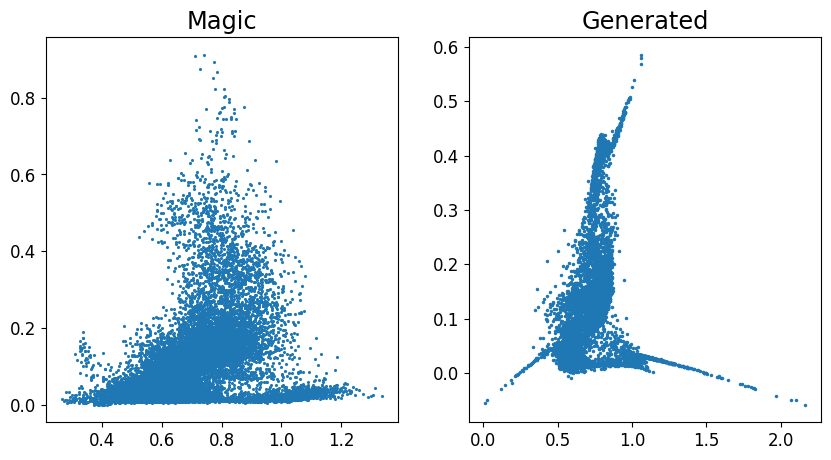

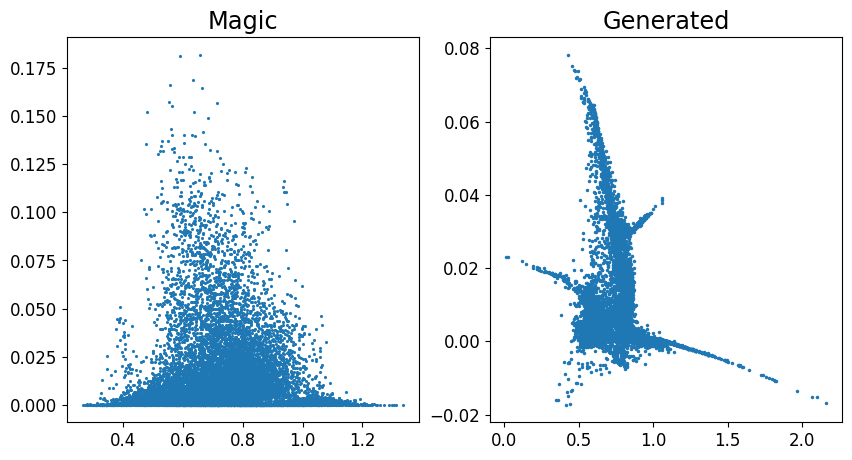

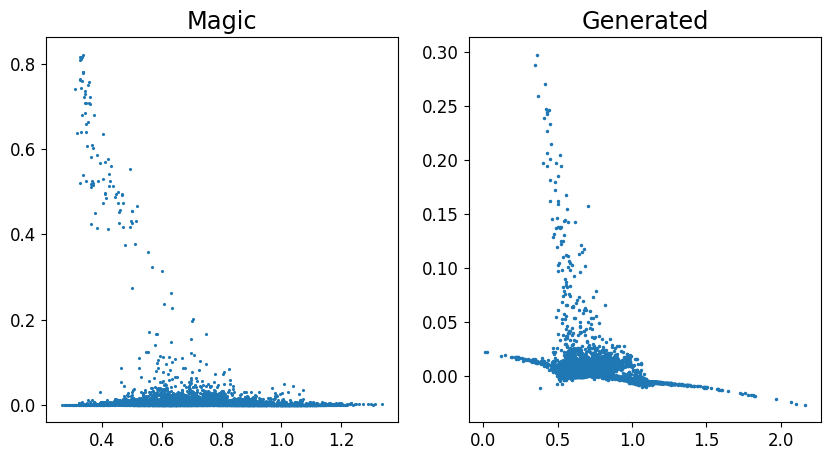

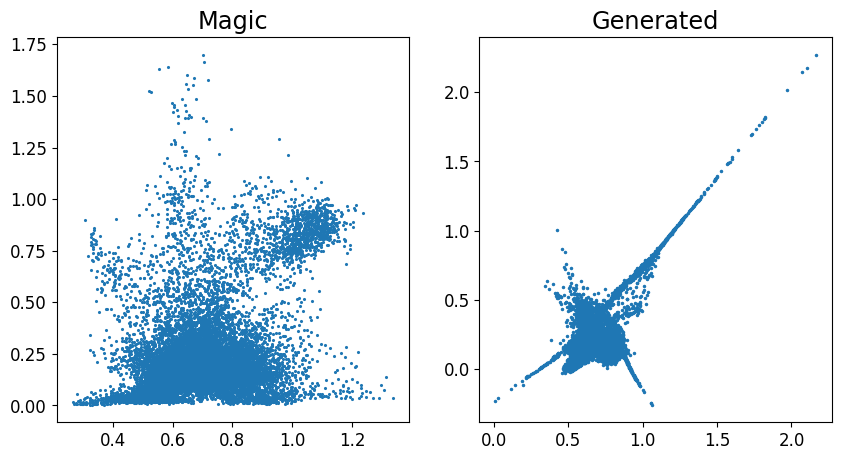

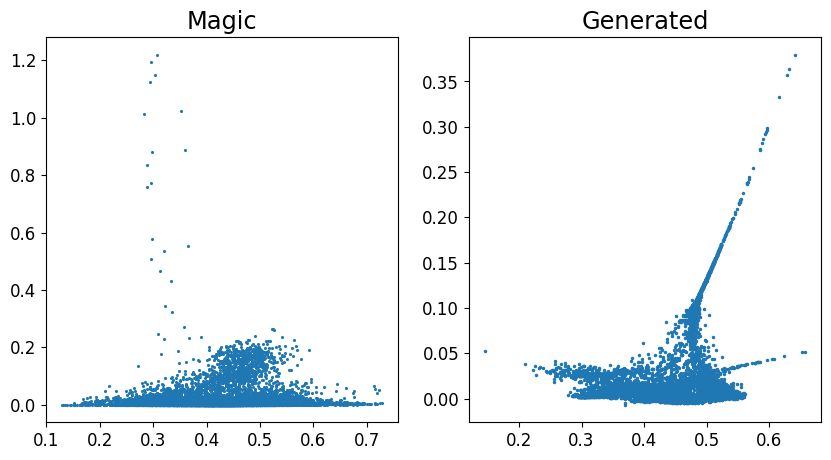

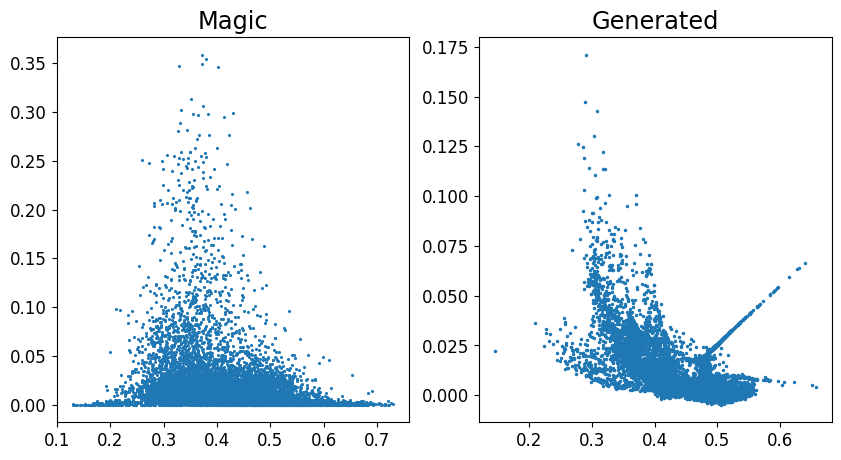

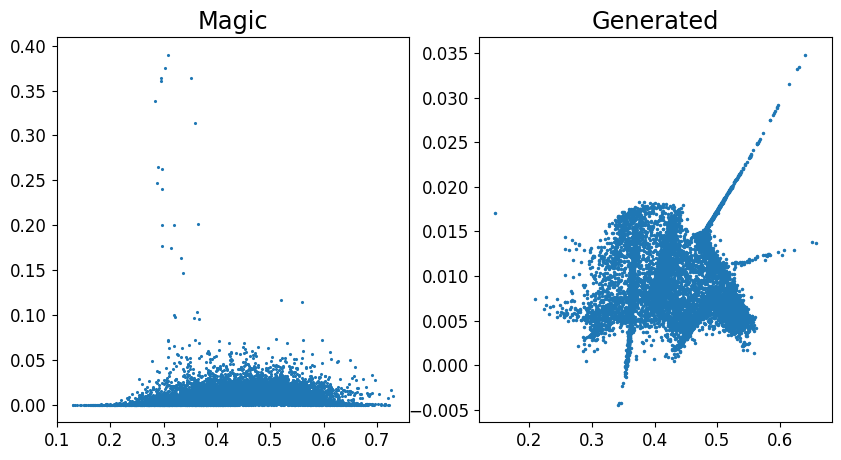

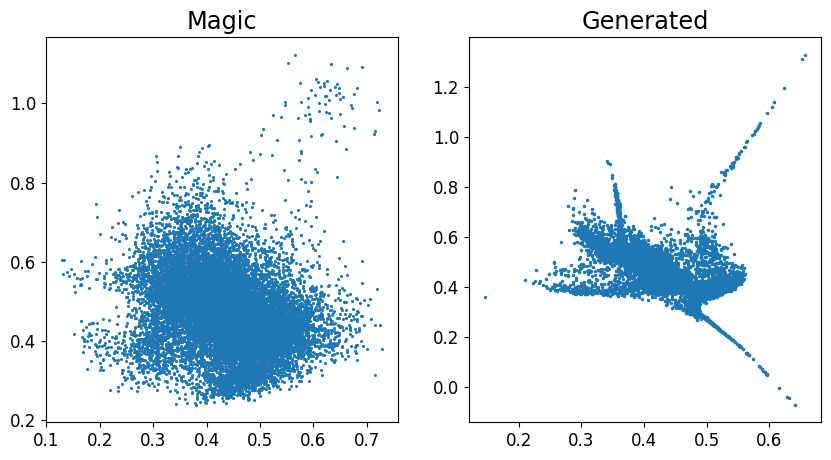

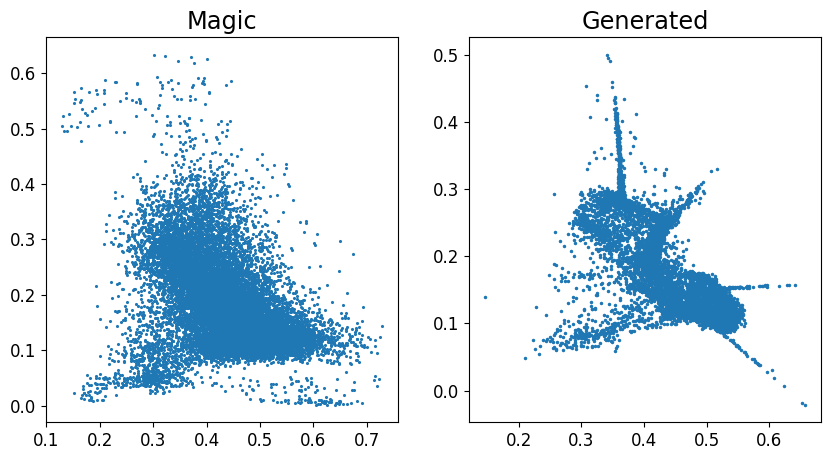

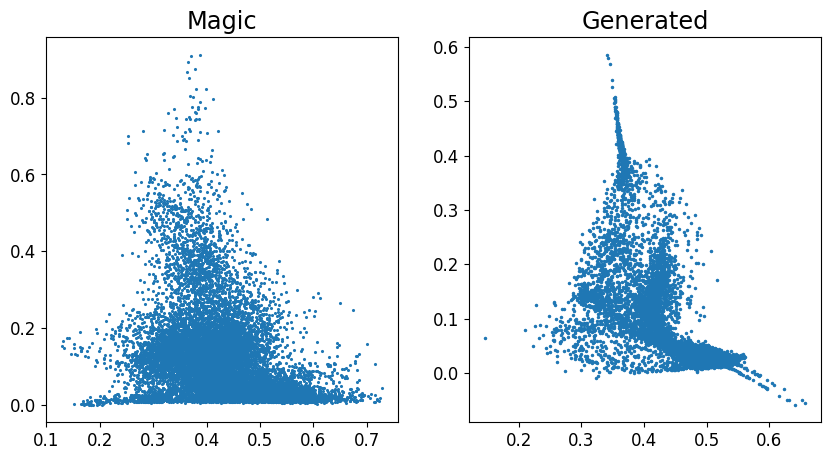

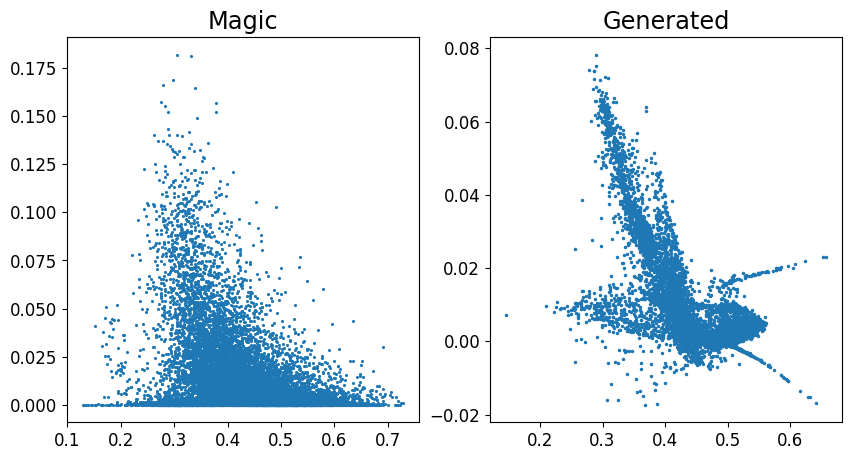

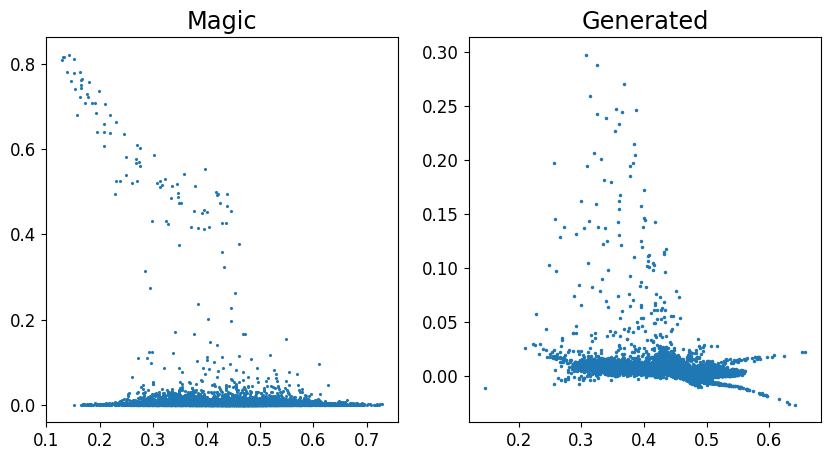

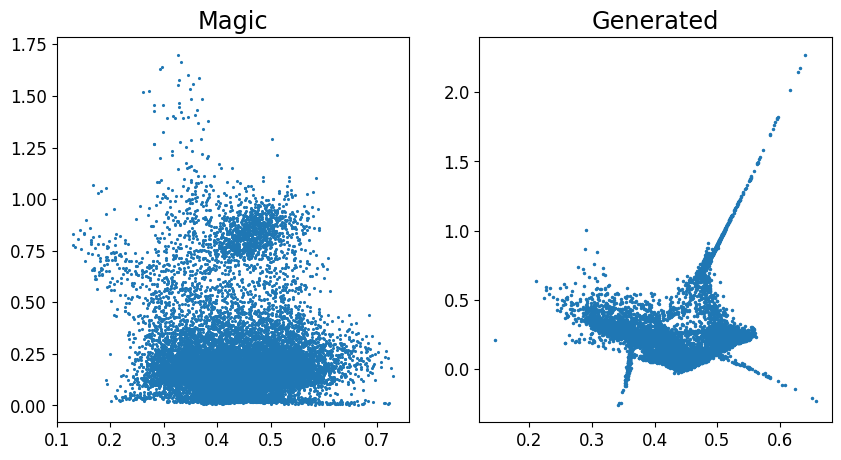

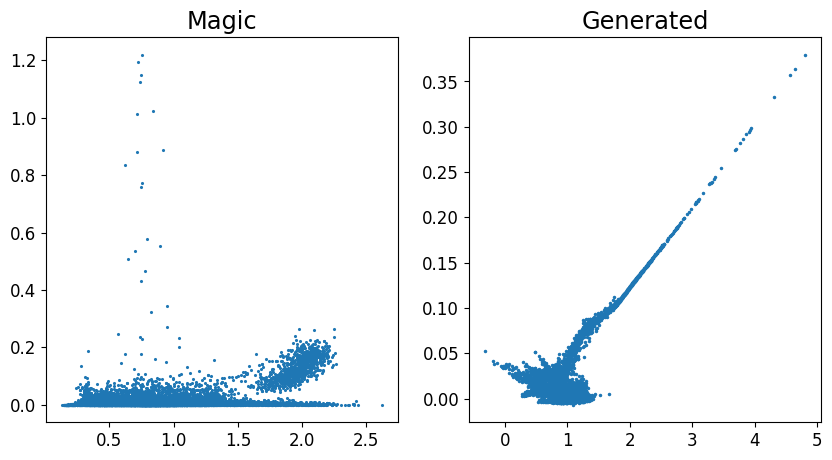

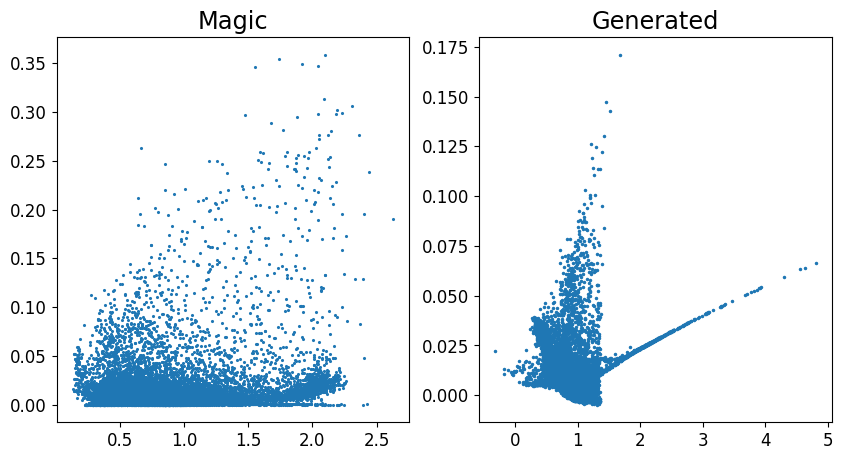

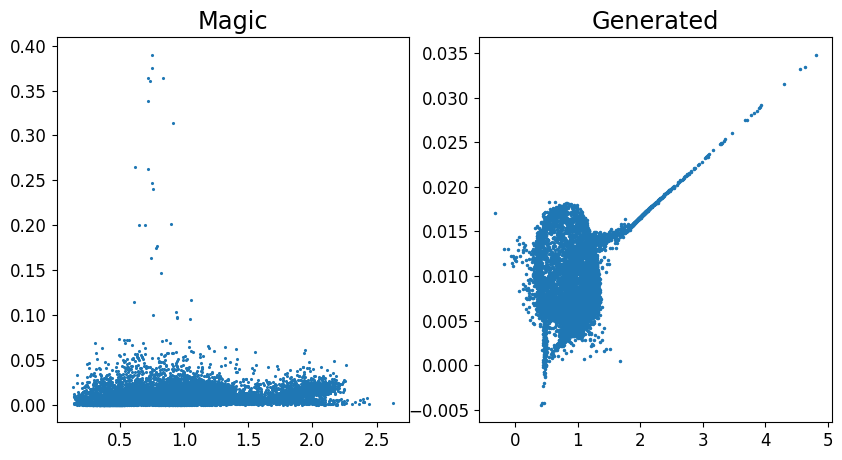

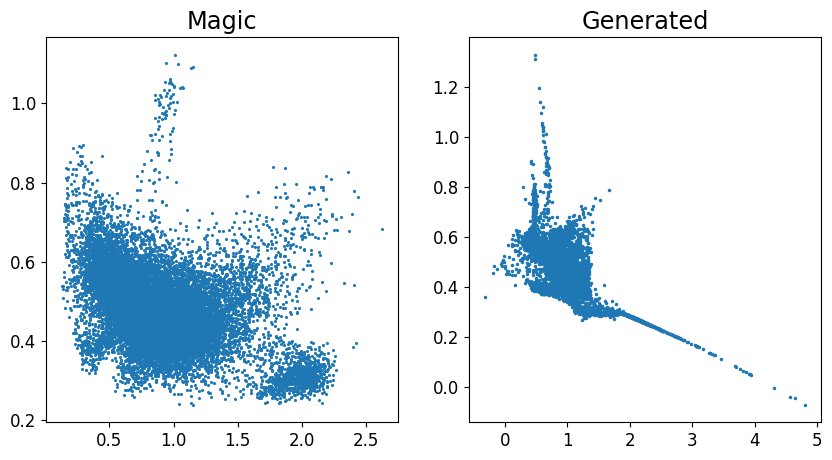

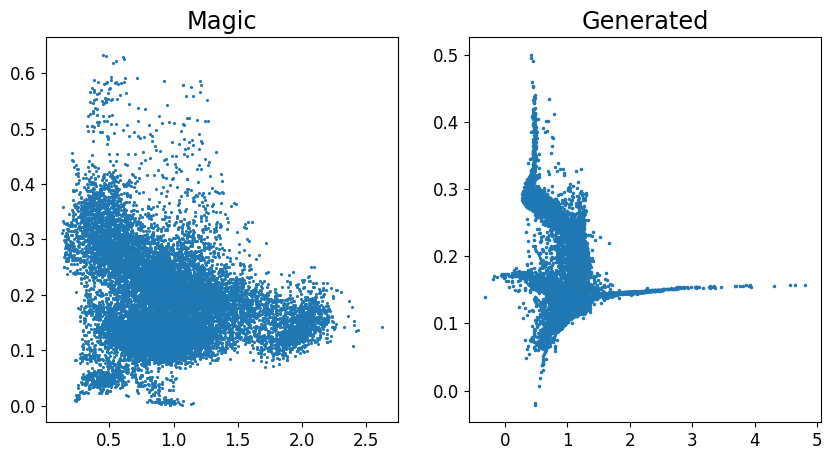

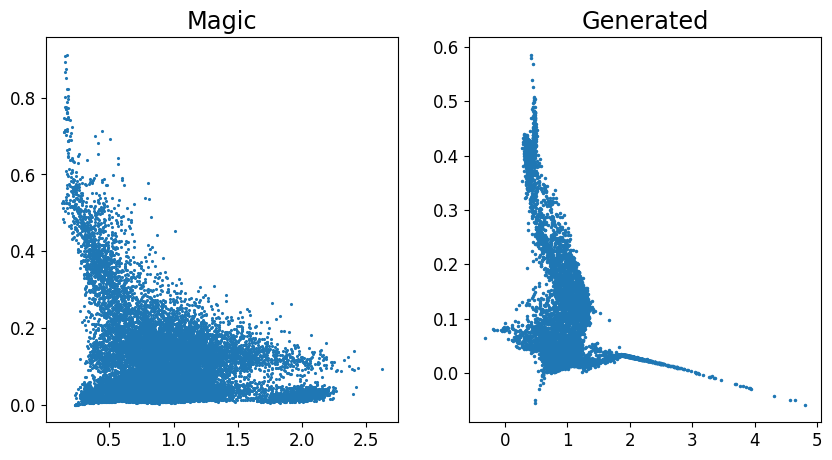

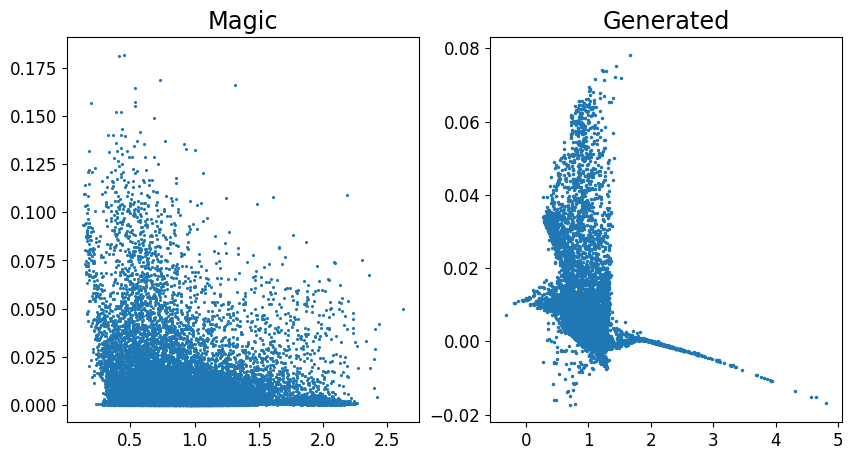

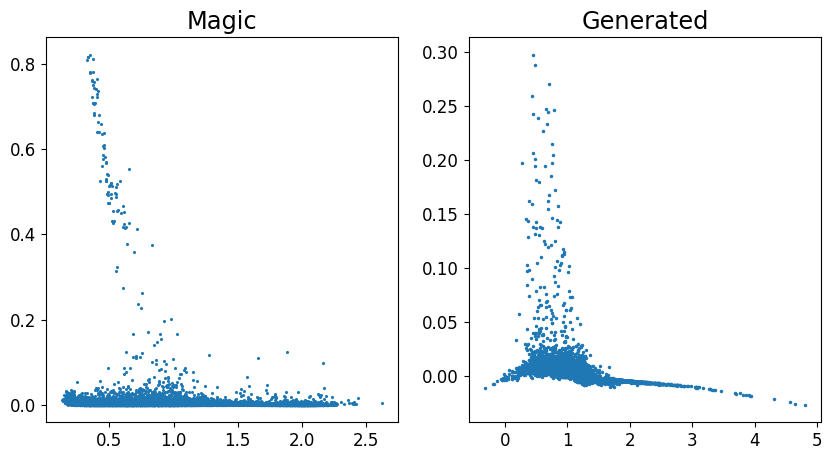

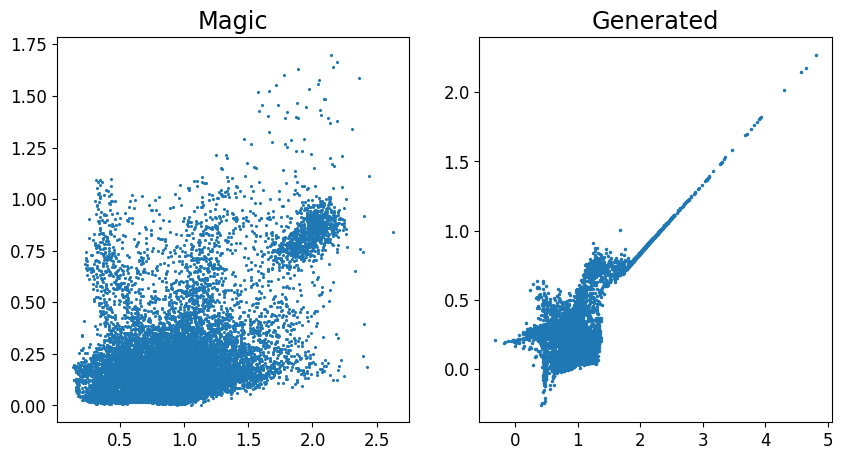

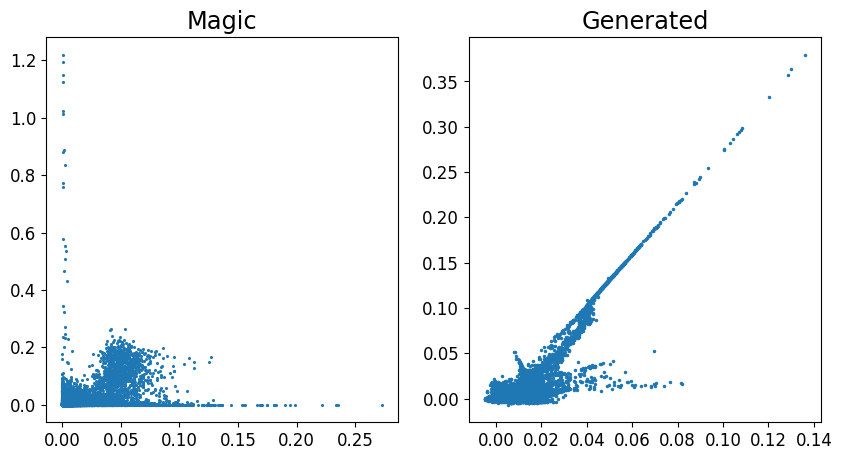

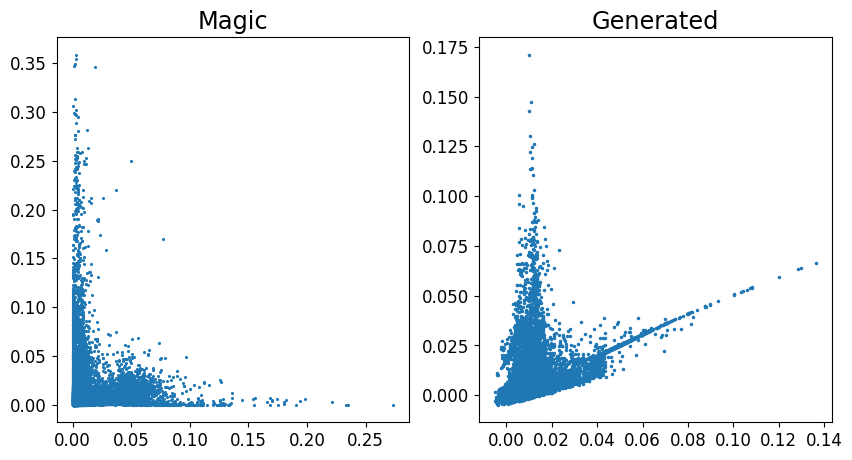

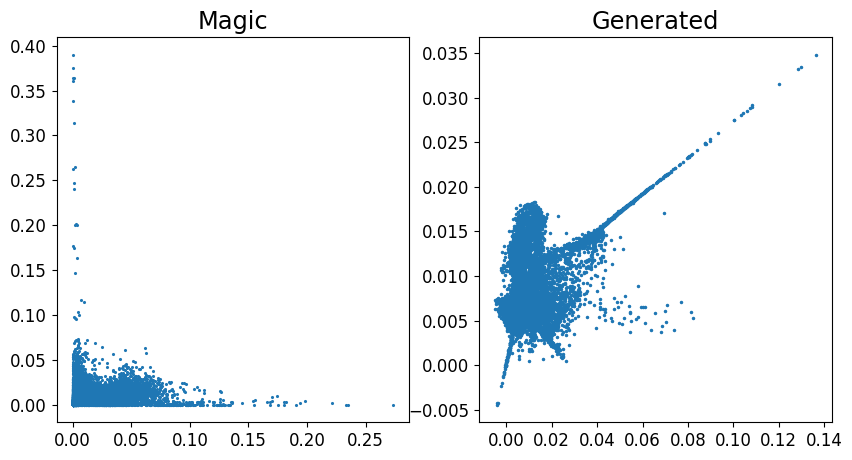

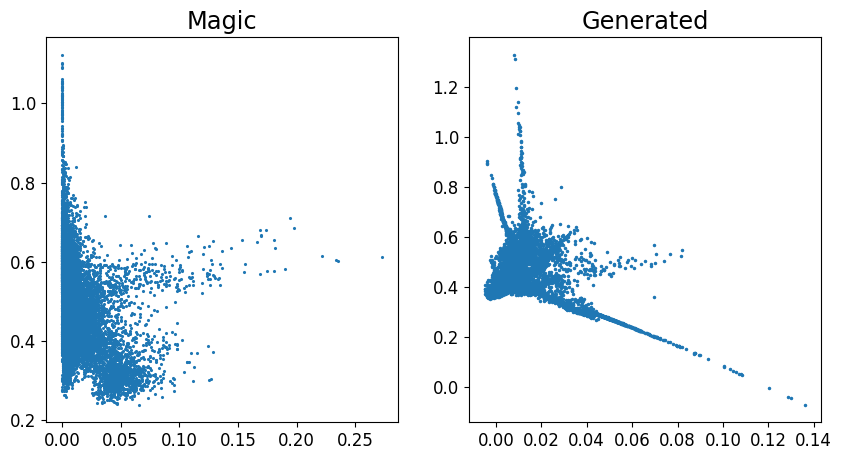

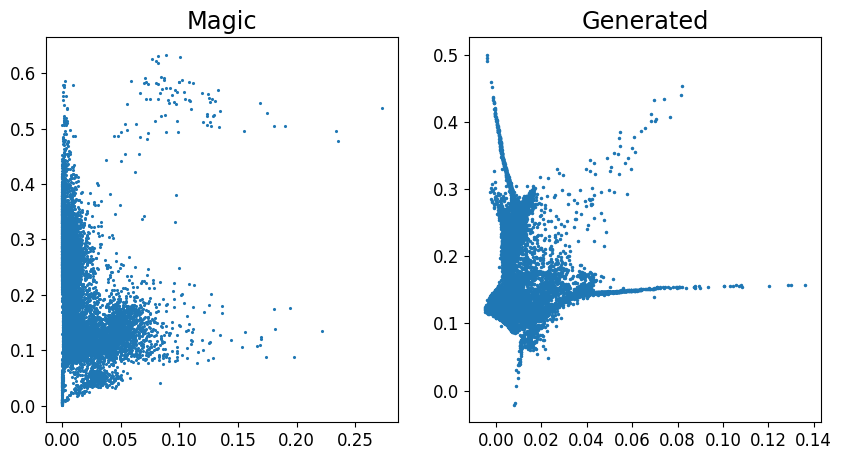

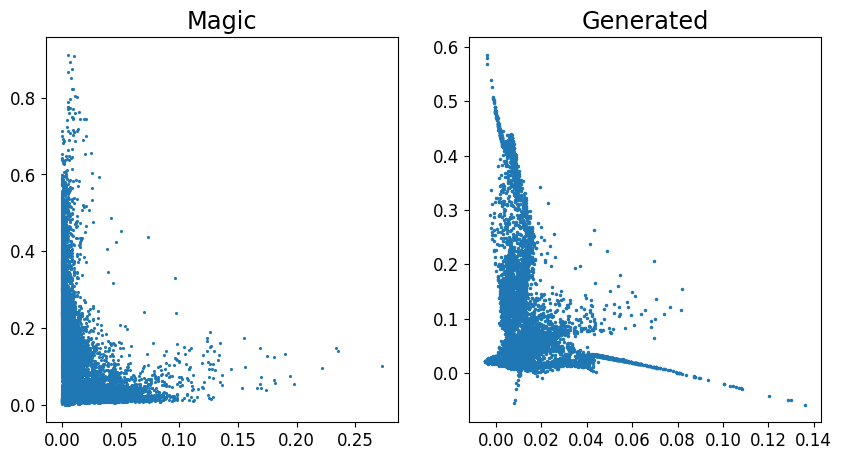

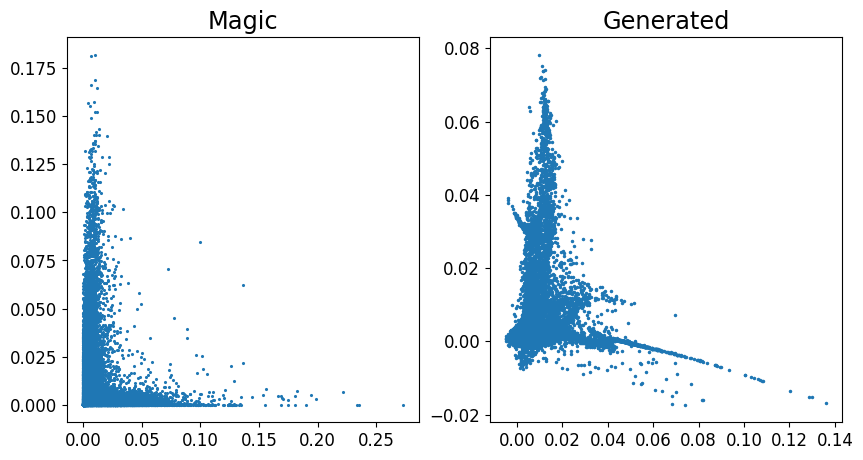

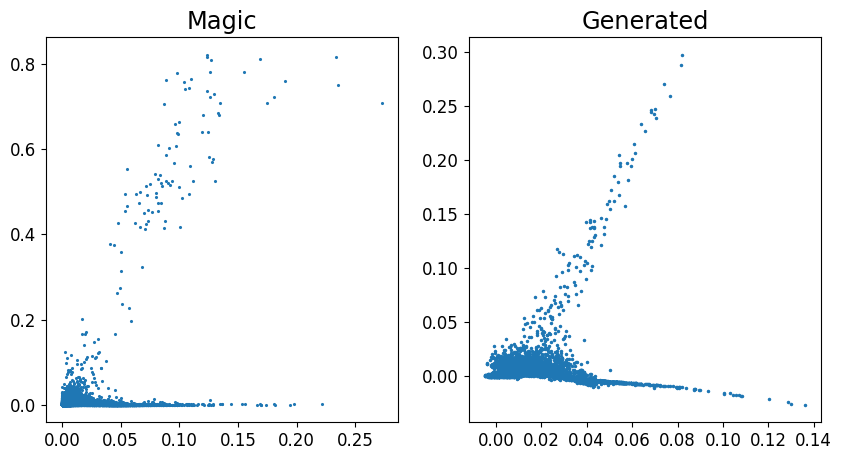

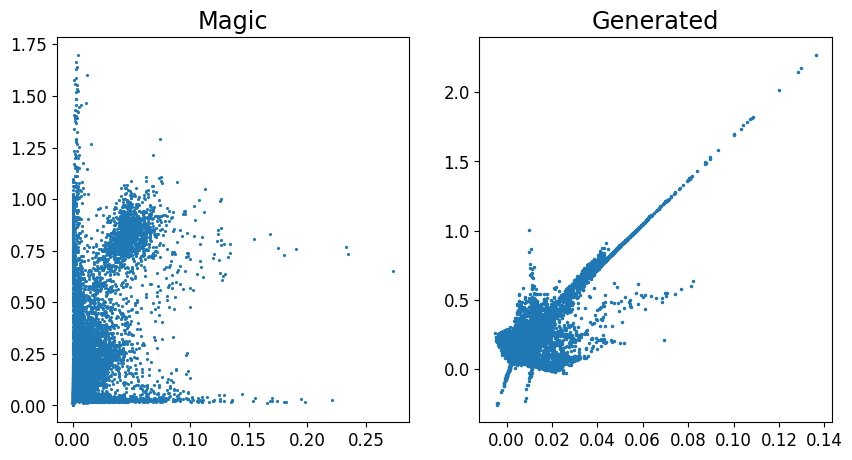

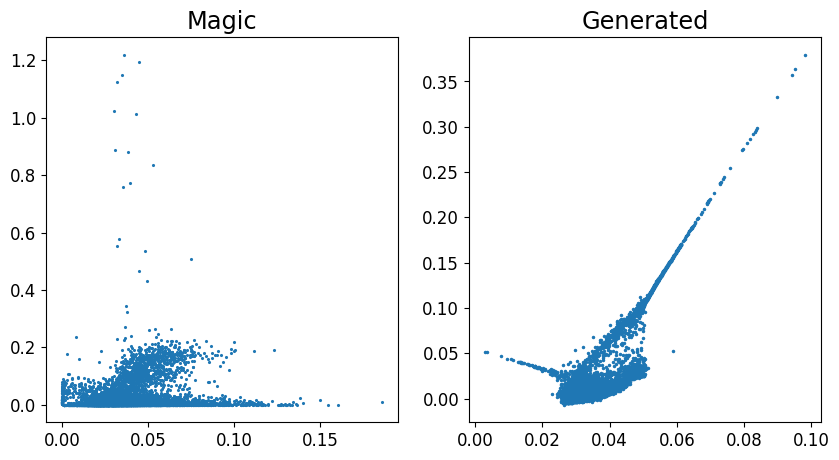

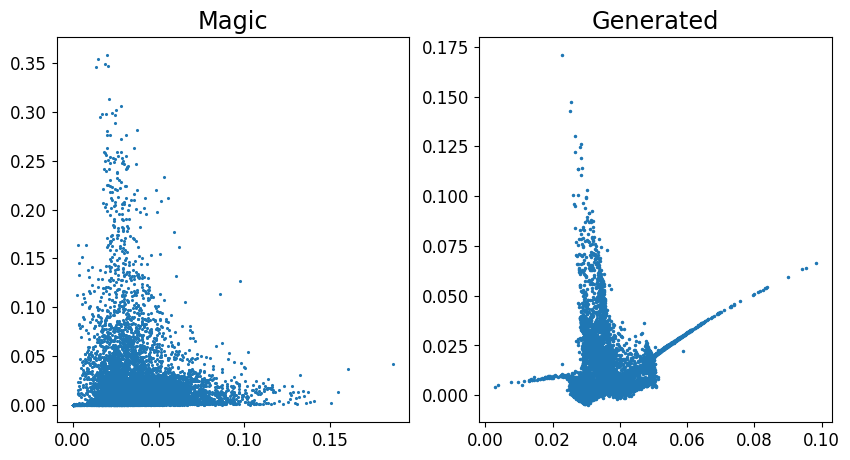

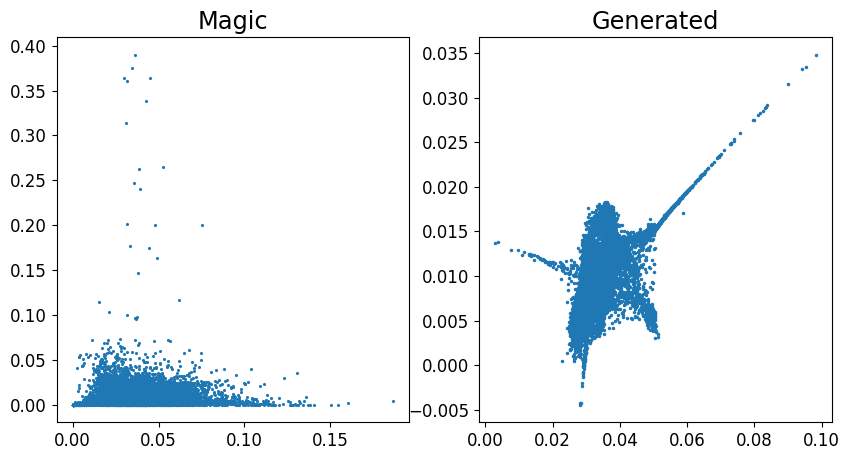

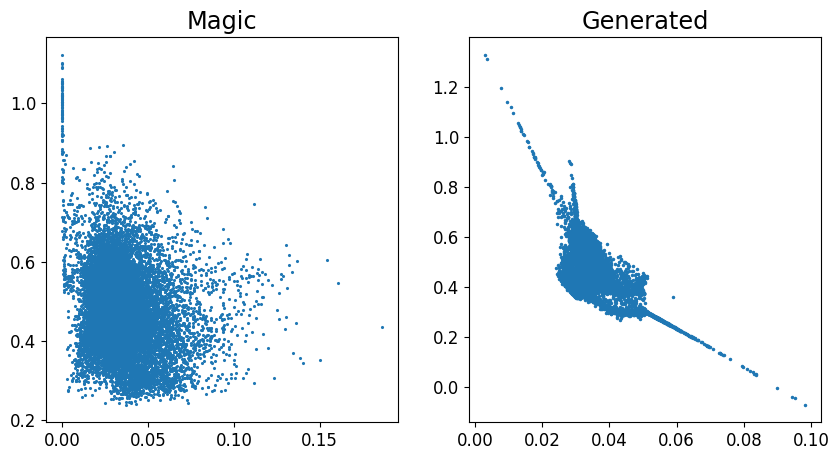

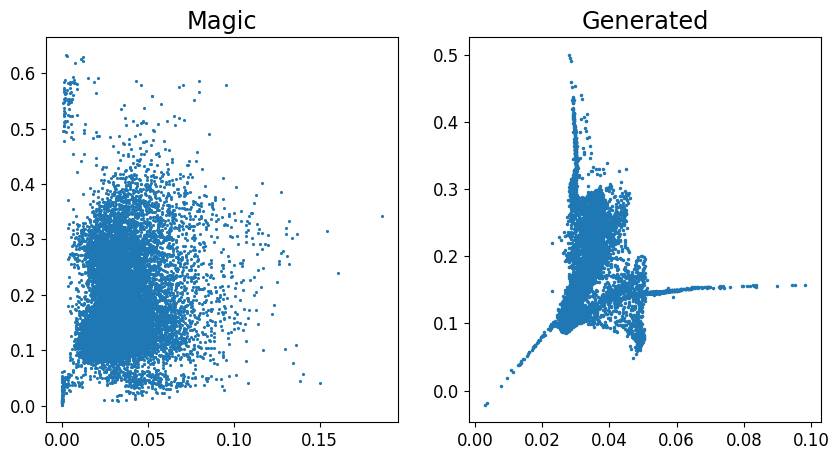

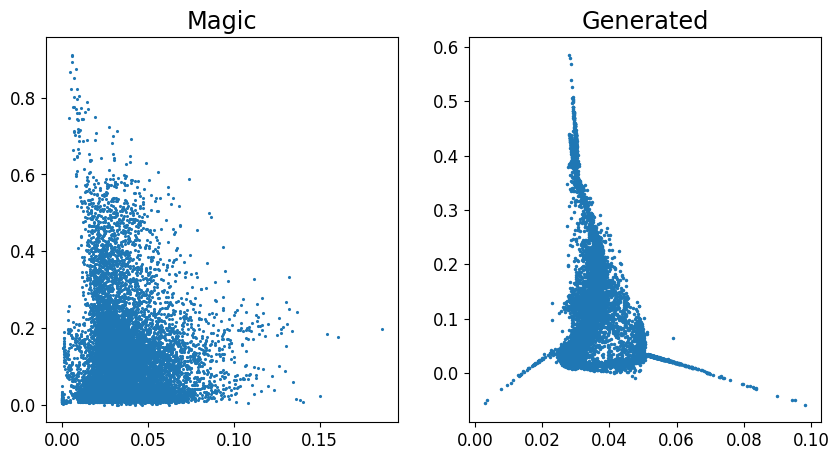

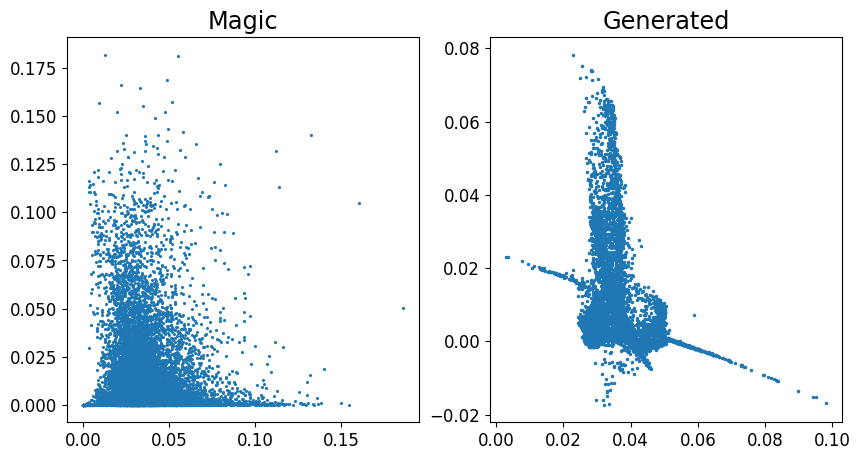

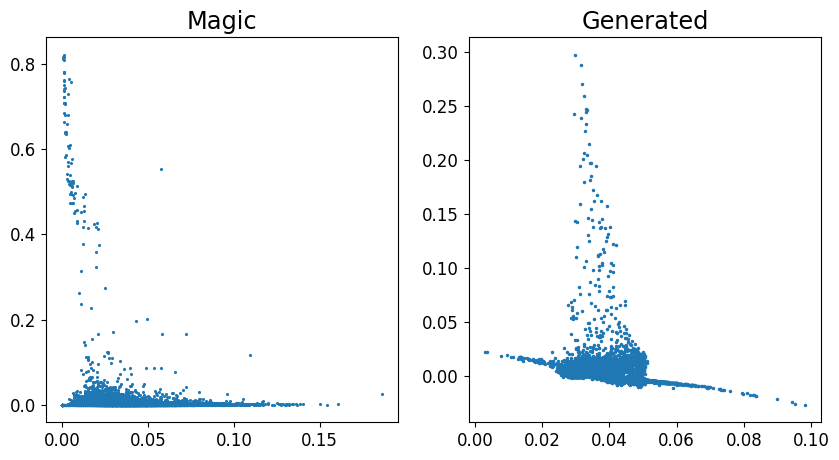

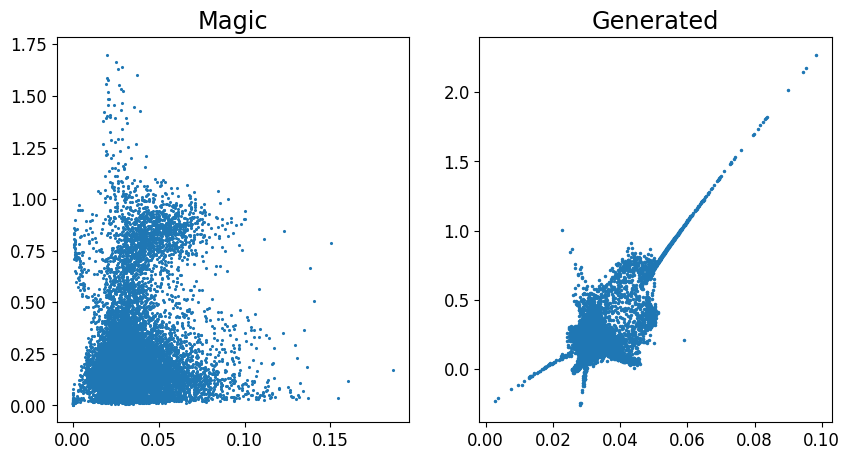

In [30]:
import matplotlib.pyplot as plt
for i in range(10):
    for j in range(11,20):
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        scprep.plot.scatter2d(X_magic[:,[i,j]], ax=axes[0], title='Magic')
        scprep.plot.scatter2d(generated_ambient[:,[i,j]], ax=axes[1], title='Generated')
        plt.show()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

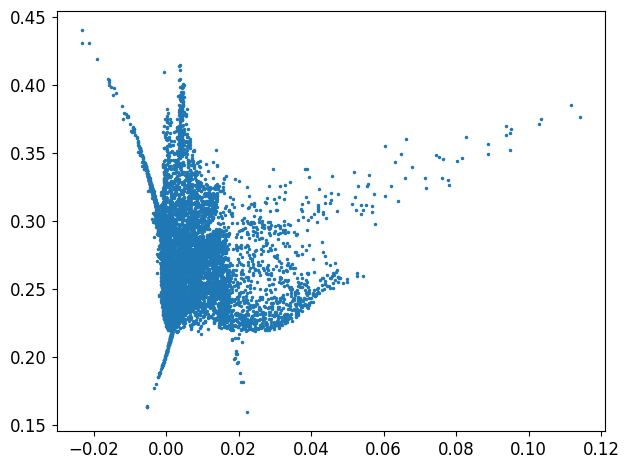